In [1]:
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"../")
import mplhep as hep
import pickle
import glob
import ROOT
import coffea
import awkward as ak
from coffea import hist, processor
from coffea.nanoevents.methods import candidate
from coffea.nanoevents.methods import vector


Welcome to JupyROOT 6.28/00


In [2]:
eras = ["all", "2022", "2023"]

In [3]:
path_2022 = "root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HMT_L1_Eff_Output/Run2022_L1_Eff_goodLumi.root"
path_2023 = "root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HMT_L1_Eff_Output/Run2023_L1_Eff_goodLumi.root"

In [4]:
ak.behavior.update(candidate.behavior)

def getLZDF(f,nEvents=-1,version="new"): #lazy dataframe with events that have cluster matched to probe muon
    events_raw = uproot.open(f)['MuonSystem']
    df = coffea.processor.LazyDataFrame(events_raw,entrystop=nEvents)
    start,stop = df._branchargs['entry_start'],df._branchargs['entry_stop']
    events = uproot.lazy(df._tree)
    events = events[start:stop]
    return events

In [5]:
events_2022 = getLZDF(path_2022)
events_2023 = getLZDF(path_2023)

events_2022 = events_2022[events_2022["runNum"]>=360019]

events_all = ak.concatenate([events_2022, events_2023])

In [6]:
events_all.fields

['runNum',
 'MC_condition',
 'lumiSec',
 'evtNum',
 'mH',
 'mX',
 'ctau',
 'category',
 'npv',
 'npu',
 'weight',
 'lepOverallSF',
 'pileupWeight',
 'numProbeMuons',
 'Flag_HBHENoiseFilter',
 'Flag_BadPFMuonFilter',
 'Flag_HBHEIsoNoiseFilter',
 'Flag_CSCTightHaloFilter',
 'Flag_globalSuperTightHalo2016Filter',
 'Flag_goodVertices',
 'Flag_ecalBadCalibFilter',
 'Flag_BadChargedCandidateFilter',
 'Flag_eeBadScFilter',
 'Flag_all',
 'Flag2_HBHENoiseFilter',
 'Flag2_HBHEIsoNoiseFilter',
 'Flag2_BadPFMuonFilter',
 'Flag2_globalSuperTightHalo2016Filter',
 'Flag2_globalTightHalo2016Filter',
 'Flag2_BadChargedCandidateFilter',
 'Flag2_EcalDeadCellTriggerPrimitiveFilter',
 'Flag2_ecalBadCalibFilter',
 'Flag2_eeBadScFilter',
 'Flag2_all',
 'rho',
 'met',
 'metPhi',
 'gHiggsPt',
 'gHiggsE',
 'gHiggsEta',
 'gHiggsPhi',
 'nCscRings',
 'nDtRings',
 'nCscRechitClusters',
 'cscRechitCluster_match_gLLP',
 'cscRechitCluster_match_gLLP_minDeltaR',
 'cscRechitCluster_match_gLLP_index',
 'cscRechitCluster_

In [7]:
events_2022_probeMuonMatched = ak.mask(events_2022, (ak.flatten(events_2022.cscRechitCluster_matchToProbeMuon))&(ak.flatten(events_2022.cscRechitCluster_PassTimeVeto))&(ak.flatten(events_2022.cscRechitClusterNRechitChamberPlus11)+ak.flatten(events_2022.cscRechitClusterNRechitChamberPlus12)+ak.flatten(events_2022.cscRechitClusterNRechitChamberMinus11)+ak.flatten(events_2022.cscRechitClusterNRechitChamberMinus12)==0))
events_2022_probeMuonMatched = events_2022_probeMuonMatched[~ak.is_none(events_2022_probeMuonMatched)]

events_2023_probeMuonMatched = ak.mask(events_2023, (ak.flatten(events_2023.cscRechitCluster_matchToProbeMuon))&(ak.flatten(events_2023.cscRechitCluster_PassTimeVeto))&(ak.flatten(events_2023.cscRechitClusterNRechitChamberPlus11)+ak.flatten(events_2023.cscRechitClusterNRechitChamberPlus12)+ak.flatten(events_2023.cscRechitClusterNRechitChamberMinus11)+ak.flatten(events_2023.cscRechitClusterNRechitChamberMinus12)==0))
events_2023_probeMuonMatched = events_2023_probeMuonMatched[~ak.is_none(events_2023_probeMuonMatched)]

events_all_probeMuonMatched = ak.mask(events_all, (ak.flatten(events_all.cscRechitCluster_matchToProbeMuon))&(ak.flatten(events_all.cscRechitCluster_PassTimeVeto))&(ak.flatten(events_all.cscRechitClusterNRechitChamberPlus11)+ak.flatten(events_all.cscRechitClusterNRechitChamberPlus12)+ak.flatten(events_all.cscRechitClusterNRechitChamberMinus11)+ak.flatten(events_all.cscRechitClusterNRechitChamberMinus12)==0))
events_all_probeMuonMatched = events_all_probeMuonMatched[~ak.is_none(events_all_probeMuonMatched)]

In [16]:
events_2022_MuonMatched_notProbe = ak.mask(events_2022,  (ak.flatten(events_2022.cscRechitCluster_matchToNotProbeMuon))&(ak.flatten(events_2022.cscRechitCluster_PassTimeVeto))&(ak.flatten(events_2022.cscRechitClusterNRechitChamberPlus11)+ak.flatten(events_2022.cscRechitClusterNRechitChamberPlus12)+ak.flatten(events_2022.cscRechitClusterNRechitChamberMinus11)+ak.flatten(events_2022.cscRechitClusterNRechitChamberMinus12)==0))
events_2022_MuonMatched_notProbe = events_2022_MuonMatched_notProbe[~ak.is_none(events_2022_MuonMatched_notProbe)]

events_2023_MuonMatched_notProbe = ak.mask(events_2023, (ak.flatten(events_2023.cscRechitCluster_matchToNotProbeMuon))&(ak.flatten(events_2023.cscRechitCluster_PassTimeVeto))&(ak.flatten(events_2023.cscRechitClusterNRechitChamberPlus11)+ak.flatten(events_2023.cscRechitClusterNRechitChamberPlus12)+ak.flatten(events_2023.cscRechitClusterNRechitChamberMinus11)+ak.flatten(events_2023.cscRechitClusterNRechitChamberMinus12)==0))
events_2023_MuonMatched_notProbe = events_2023_MuonMatched_notProbe[~ak.is_none(events_2023_MuonMatched_notProbe)]

events_all_MuonMatched_notProbe = ak.mask(events_all, (ak.flatten(events_all.cscRechitCluster_matchToNotProbeMuon))&(ak.flatten(events_all.cscRechitCluster_PassTimeVeto))&(ak.flatten(events_all.cscRechitClusterNRechitChamberPlus11)+ak.flatten(events_all.cscRechitClusterNRechitChamberPlus12)+ak.flatten(events_all.cscRechitClusterNRechitChamberMinus11)+ak.flatten(events_all.cscRechitClusterNRechitChamberMinus12)==0))
events_all_MuonMatched_notProbe = events_all_MuonMatched_notProbe[~ak.is_none(events_all_MuonMatched_notProbe)]

In [17]:
events_2022_highPtJetMatched = ak.mask(events_2022, (ak.flatten(events_2022.cscRechitCluster_matchToHighPtJet))&(ak.flatten(events_2022.cscRechitCluster_PassTimeVeto))&(ak.flatten(events_2022.cscRechitClusterNRechitChamberPlus11)+ak.flatten(events_2022.cscRechitClusterNRechitChamberPlus12)+ak.flatten(events_2022.cscRechitClusterNRechitChamberMinus11)+ak.flatten(events_2022.cscRechitClusterNRechitChamberMinus12)==0))
events_2022_highPtJetMatched = events_2022_highPtJetMatched[~ak.is_none(events_2022_highPtJetMatched)]

events_2023_highPtJetMatched = ak.mask(events_2023, (ak.flatten(events_2023.cscRechitCluster_matchToHighPtJet))&(ak.flatten(events_2023.cscRechitCluster_PassTimeVeto))&(ak.flatten(events_2023.cscRechitClusterNRechitChamberPlus11)+ak.flatten(events_2023.cscRechitClusterNRechitChamberPlus12)+ak.flatten(events_2023.cscRechitClusterNRechitChamberMinus11)+ak.flatten(events_2023.cscRechitClusterNRechitChamberMinus12)==0))
events_2023_highPtJetMatched = events_2023_highPtJetMatched[~ak.is_none(events_2023_highPtJetMatched)]

events_all_highPtJetMatched = ak.mask(events_all, (ak.flatten(events_all.cscRechitCluster_matchToHighPtJet))&(ak.flatten(events_all.cscRechitCluster_PassTimeVeto))&(ak.flatten(events_all.cscRechitClusterNRechitChamberPlus11)+ak.flatten(events_all.cscRechitClusterNRechitChamberPlus12)+ak.flatten(events_all.cscRechitClusterNRechitChamberMinus11)+ak.flatten(events_all.cscRechitClusterNRechitChamberMinus12)==0))
events_all_highPtJetMatched = events_all_highPtJetMatched[~ak.is_none(events_all_highPtJetMatched)]

In [18]:
events_2022_lowPtJetMatched = ak.mask(events_2022, (ak.flatten(events_2022.cscRechitCluster_matchToLowPtJet))&(ak.flatten(events_2022.cscRechitCluster_PassTimeVeto))&(ak.flatten(events_2022.cscRechitClusterNRechitChamberPlus11)+ak.flatten(events_2022.cscRechitClusterNRechitChamberPlus12)+ak.flatten(events_2022.cscRechitClusterNRechitChamberMinus11)+ak.flatten(events_2022.cscRechitClusterNRechitChamberMinus12)==0))
events_2022_lowPtJetMatched = events_2022_lowPtJetMatched[~ak.is_none(events_2022_lowPtJetMatched)]

events_2023_lowPtJetMatched = ak.mask(events_2023, (ak.flatten(events_2023.cscRechitCluster_matchToLowPtJet))&(ak.flatten(events_2023.cscRechitCluster_PassTimeVeto))&(ak.flatten(events_2023.cscRechitClusterNRechitChamberPlus11)+ak.flatten(events_2023.cscRechitClusterNRechitChamberPlus12)+ak.flatten(events_2023.cscRechitClusterNRechitChamberMinus11)+ak.flatten(events_2023.cscRechitClusterNRechitChamberMinus12)==0))
events_2023_lowPtJetMatched = events_2023_lowPtJetMatched[~ak.is_none(events_2023_lowPtJetMatched)]

events_all_lowPtJetMatched = ak.mask(events_all, (ak.flatten(events_all.cscRechitCluster_matchToLowPtJet))&(ak.flatten(events_all.cscRechitCluster_PassTimeVeto))&(ak.flatten(events_all.cscRechitClusterNRechitChamberPlus11)+ak.flatten(events_all.cscRechitClusterNRechitChamberPlus12)+ak.flatten(events_all.cscRechitClusterNRechitChamberMinus11)+ak.flatten(events_all.cscRechitClusterNRechitChamberMinus12)==0))
events_all_lowPtJetMatched = events_all_lowPtJetMatched[~ak.is_none(events_all_lowPtJetMatched)]

In [19]:
events_2022_nothingMatched = ak.mask(events_2022, (ak.flatten(events_2022.cscRechitCluster_notMatched))&(ak.flatten(events_2022.cscRechitCluster_PassTimeVeto))&(ak.flatten(events_2022.cscRechitClusterNRechitChamberPlus11)+ak.flatten(events_2022.cscRechitClusterNRechitChamberPlus12)+ak.flatten(events_2022.cscRechitClusterNRechitChamberMinus11)+ak.flatten(events_2022.cscRechitClusterNRechitChamberMinus12)==0))
events_2022_nothingMatched = events_2022_nothingMatched[~ak.is_none(events_2022_nothingMatched)]

events_2023_nothingMatched = ak.mask(events_2023, (ak.flatten(events_2023.cscRechitCluster_notMatched))&(ak.flatten(events_2023.cscRechitCluster_PassTimeVeto))&(ak.flatten(events_2023.cscRechitClusterNRechitChamberPlus11)+ak.flatten(events_2023.cscRechitClusterNRechitChamberPlus12)+ak.flatten(events_2023.cscRechitClusterNRechitChamberMinus11)+ak.flatten(events_2023.cscRechitClusterNRechitChamberMinus12)==0))
events_2023_nothingMatched = events_2023_nothingMatched[~ak.is_none(events_2023_nothingMatched)]

events_all_nothingMatched = ak.mask(events_all, (ak.flatten(events_all.cscRechitCluster_notMatched))&(ak.flatten(events_all.cscRechitCluster_PassTimeVeto))&(ak.flatten(events_all.cscRechitClusterNRechitChamberPlus11)+ak.flatten(events_all.cscRechitClusterNRechitChamberPlus12)+ak.flatten(events_all.cscRechitClusterNRechitChamberMinus11)+ak.flatten(events_all.cscRechitClusterNRechitChamberMinus12)==0))
events_all_nothingMatched = events_all_nothingMatched[~ak.is_none(events_all_nothingMatched)]

In [20]:
print(len(events_all_probeMuonMatched))
print(len(events_all_MuonMatched_notProbe))
print(len(events_all_highPtJetMatched))
print(len(events_all_lowPtJetMatched))
print(len(events_all_nothingMatched))

764085
26651
84667
88862
161269


In [21]:
chamber_locations = {
    "ME11": {"MinR": 100, "MaxR": 275, "minZ": 580, "maxZ": 632, "HLT_thresh": 500, "branch_names": ["cscRechitClusterNRechitChamberMinus11", "cscRechitClusterNRechitChamberPlus11"], "binning": hist.Bin("cluster_size", "Cluster Size", np.concatenate([np.arange(0, 200, 20), np.arange(200, 1000, 100)]))},
    "ME12": {"MinR": 275, "MaxR": 465, "minZ": 668, "maxZ": 725, "HLT_thresh": 200, "branch_names": ["cscRechitClusterNRechitChamberMinus12", "cscRechitClusterNRechitChamberPlus12"], "binning": hist.Bin("cluster_size", "Cluster Size", np.concatenate([np.arange(0, 200, 20), np.arange(200, 1000, 100)]))},
    "ME13": {"MinR": 505, "MaxR": 700, "minZ": 668, "maxZ": 724, "HLT_thresh": 200, "branch_names": ["cscRechitClusterNRechitChamberMinus13", "cscRechitClusterNRechitChamberPlus13"], "binning": hist.Bin("cluster_size", "Cluster Size", np.concatenate([np.arange(0, 200, 20), np.arange(200, 1000, 100)]))},
    "ME21": {"MinR": 139, "MaxR": 345, "minZ": 789, "maxZ": 850, "HLT_thresh": 500, "branch_names": ["cscRechitClusterNRechitChamberMinus21", "cscRechitClusterNRechitChamberPlus21"], "binning": hist.Bin("cluster_size", "Cluster Size", np.concatenate([np.arange(0, 500, 100), np.arange(500, 1000, 400)]))},
    "ME22": {"MinR": 357, "MaxR": 700, "minZ": 791, "maxZ": 850, "HLT_thresh": 200, "branch_names": ["cscRechitClusterNRechitChamberMinus22", "cscRechitClusterNRechitChamberPlus22"], "binning": hist.Bin("cluster_size", "Cluster Size", np.concatenate([np.arange(0, 200, 50), np.arange(200, 1000, 100)]))},
    "ME31": {"MinR": 160, "MaxR": 345, "minZ": 915, "maxZ": 970, "HLT_thresh": 500, "branch_names": ["cscRechitClusterNRechitChamberMinus31", "cscRechitClusterNRechitChamberPlus31"], "binning": hist.Bin("cluster_size", "Cluster Size", np.concatenate([np.arange(0, 500, 100), np.arange(500, 1000, 400)]))},
    "ME32": {"MinR": 357, "MaxR": 700, "minZ": 911, "maxZ": 970, "HLT_thresh": 200, "branch_names": ["cscRechitClusterNRechitChamberMinus32", "cscRechitClusterNRechitChamberPlus32"], "binning": hist.Bin("cluster_size", "Cluster Size", np.concatenate([np.arange(0, 200, 50), np.arange(200, 1000, 100)]))},
    "ME41": {"MinR": 178, "MaxR": 345, "minZ": 1002, "maxZ": 1063, "HLT_thresh": 500, "branch_names": ["cscRechitClusterNRechitChamberMinus41", "cscRechitClusterNRechitChamberPlus41"], "binning": hist.Bin("cluster_size", "Cluster Size", np.concatenate([np.arange(0, 500, 100), np.arange(500, 1000, 400)]))},
    "ME42": {"MinR": 357, "MaxR": 700, "minZ": 1002, "maxZ": 1063, "HLT_thresh": 200, "branch_names": ["cscRechitClusterNRechitChamberMinus42", "cscRechitClusterNRechitChamberPlus42"], "binning": hist.Bin("cluster_size", "Cluster Size", np.concatenate([np.arange(0, 200, 50), np.arange(200, 1000, 100)]))}
}

In [22]:
nRechits_branches = ["cscRechitClusterNRechitChamberMinus11", "cscRechitClusterNRechitChamberPlus11", "cscRechitClusterNRechitChamberMinus12", "cscRechitClusterNRechitChamberPlus12",
                    "cscRechitClusterNRechitChamberMinus13", "cscRechitClusterNRechitChamberPlus13", "cscRechitClusterNRechitChamberMinus21", "cscRechitClusterNRechitChamberPlus21",
                    "cscRechitClusterNRechitChamberMinus22", "cscRechitClusterNRechitChamberPlus22", "cscRechitClusterNRechitChamberMinus31", "cscRechitClusterNRechitChamberPlus31",
                    "cscRechitClusterNRechitChamberMinus32", "cscRechitClusterNRechitChamberPlus32", "cscRechitClusterNRechitChamberMinus41", "cscRechitClusterNRechitChamberPlus41",
                    "cscRechitClusterNRechitChamberMinus42", "cscRechitClusterNRechitChamberPlus42"]

In [23]:
def noisy_cluster_events(data):
    #return (np.abs(ak.flatten(data.cscRechitClusterPhi))<0.2) & (ak.flatten(data.cscRechitClusterEta < -2)) & (ak.flatten(data.cscRechitClusterZ < -900)) & (data.runNum >367079)
    #return (np.abs(ak.flatten(data.cscRechitClusterPhi))>3) & (ak.flatten(data.cscRechitClusterEta < -1.9))
    mask = (ak.flatten(data.cscRechitClusterPhi)>0.4) & (ak.flatten(data.cscRechitClusterPhi)<0.8)
    print(mask)
    return (((ak.flatten(data.cscRechitClusterPhi)>0.4) & (ak.flatten(data.cscRechitClusterPhi)<0.8))|(np.abs(ak.flatten(data.cscRechitClusterPhi))>2.8))

In [24]:
#code to mask for clusters for which majority of events are in designated chamber
#require greater than 90% of hits to be in given chamber as well
def compute_chamber_mask(data, chamber, threshold, endcap=None):
    nRechits_byChamber = {}
    final_masks = []
    for x in range(2):
        correct_chamber_branch = chamber_locations[chamber]["branch_names"][x]
        incorrect_chamber_branches = []
        for chamber_branch in nRechits_branches:
            if chamber_branch != correct_chamber_branch:
                incorrect_chamber_branches.append(chamber_branch)         
        mask = ak.flatten(data[correct_chamber_branch])>ak.flatten(data[incorrect_chamber_branches[0]])
        for idx in range(1, len(incorrect_chamber_branches)):
            mask = np.logical_and(mask, ak.flatten(data[correct_chamber_branch])>ak.flatten(data[incorrect_chamber_branches[idx]]))
        mask = np.logical_and(mask, (ak.flatten(data[correct_chamber_branch])/ak.flatten(data["cscRechitClusterSize"])>=threshold))
        #code to mask out negative endcap clusters in problematic region
        if x==0 and (chamber=="ME31" or chamber=="ME41"):
        #    print("applying mask")
            mask = np.logical_and(mask, np.logical_not(noisy_cluster_events(data)))
        #print(ak.count_nonzero(mask))
        final_masks.append(mask)
    if endcap==None:
        return np.logical_or(final_masks[0], final_masks[1])
    else:
        return final_masks[endcap]

In [25]:
#function to to return ratio histograms
def get_efficiency_hists(data, chamber_list, bins, endcap=None):
    
    subMasks = []
    for chamber in chamber_list:
        #print("Mask for Chamber: ", chamber)
        subMasks.append(np.array(compute_chamber_mask(data, chamber, 0.9, endcap)))
    
    #intermed_stack = np.stack(subMasks, axis=1)
    #print(intermed_stack.shape)
    total_mask = np.logical_or.reduce(np.array(subMasks))
    print(np.count_nonzero(total_mask))
    #print("past Masks")
    #COMMENT OUT WHEN NOT DOING NOISE MASK INVERSION
    #total_mask = np.logical_and(total_mask, noisy_cluster_events(data))
    denom = ak.mask(ak.flatten(data.cscRechitClusterSize), total_mask)
    
    num = ak.mask(denom, ak.mask(np.logical_or(data.L1_SingleMuShower_Nominal, data.L1_SingleMuShower_Tight),total_mask))
    denom = denom[~ak.is_none(denom)]
    num = num[~ak.is_none(num)]
    
    num_hist = hist.Hist("Counts", rechits_axis, bins)
    arr_to_fill = num
    num_hist.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)

    denom_hist = hist.Hist("Counts", rechits_axis, bins)
    arr_to_fill = denom
    denom_hist.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)

    return num_hist, denom_hist


In [26]:
#colors = ["green", "red", "black"]
colors = ["black"]
center_of_mass_energy = 13.6
rechits_axis = hist.Cat("sample", "sample")

In [37]:
bins_ME41 = hist.Bin("cluster_size", "Cluster Size", np.concatenate([np.arange(0, 500, 100), np.arange(500, 1000, 400)]))
bins_ME22 = hist.Bin("cluster_size", "Cluster Size", np.concatenate([np.arange(0, 200, 50), np.arange(200, 1000, 100)]))

In [38]:
plt.style.use(hep.style.CMS)

861


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


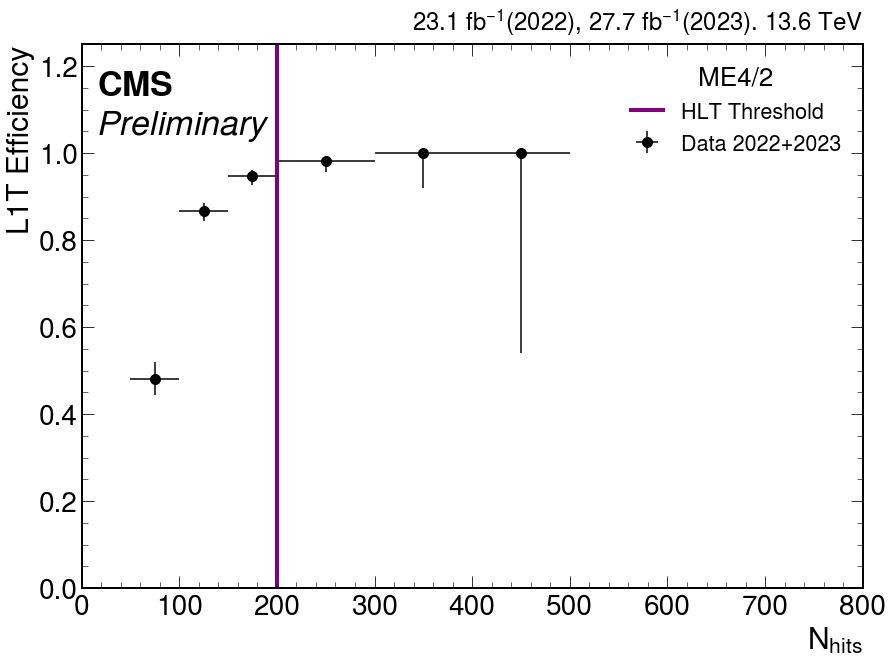

In [44]:
myString = "newMerge_forPaper"
plt.figure(figsize=(14,10))
chamber="ME42"
chamber_list = ["ME42"]
#chamber_list = ["ME13", "ME22", "ME32", "ME42"]
chamber_with_slash = chamber[:3] + '/' + chamber[3]
bins = bins_ME22
for num, sample in enumerate(['all']):
    #if sample=='all':
        #labelName = '2022 + 2023'
    if num==0:
        plt.axvline(chamber_locations["ME42"]["HLT_thresh"], color="purple", label="HLT Threshold", linewidth=4)
    
    labelName = sample
    num_hist, denom_hist = get_efficiency_hists(events_all_probeMuonMatched, chamber_list, bins)
    
    hist.plotratio(
        ax=plt.gca(),
        num =num_hist.project(bins),
        denom=denom_hist.project(bins),
        error_opts={'marker': '.', 'markersize': 20, 'color':colors[num]},
        unc='clopper-pearson',
        label= "Data 2022+2023",
        clear=False,
        xerr=True
        )
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,3,1,2]

#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title=chamber_with_slash, loc=8)
plt.legend(title=chamber_with_slash)
plt.xlabel("$\mathregular{N_{hits}}$", fontsize=30)
plt.ylabel("L1T Efficiency", fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=28)
#hep.cms.label(ax=plt.gca(),data=True, lumi="50.8", fontsize=28, loc=2,COM=13.6)
plt.gca().text(1.0, 1.07, "23.1 $\mathregular{fb^{-1}}$(2022), 27.7 $\mathregular{fb^{-1}}$(2023). 13.6 TeV", transform=plt.gca().transAxes,
        fontsize=24, verticalalignment='top', horizontalalignment='right')
plt.gca().text(0.02, 0.95, r"$\bf{CMS}$"+"\n"+r"$\it{Preliminary}$", transform=plt.gca().transAxes, fontsize=34, verticalalignment='top', horizontalalignment='left')
plt.xlim(0,800)
plt.ylim(0, 1.25)
#plt.title("Matched to Probe Muon - Positive Endcap", fontsize=24)
plt.savefig(f"L1_Efficiency_Plots/{chamber}_{myString}.png")

In [ ]:
myString = "negEndcap_bothyears_noPhi>3"
plt.figure(figsize=(12,8))
chamber="ME41"
chamber_with_slash = chamber[:3] + '/' + chamber[3]
bins = bins_ME41
for num, sample in enumerate(['all']):
    #if sample=='all':
        #labelName = '2022 + 2023'
    if num==0:
        plt.axvline(chamber_locations[chamber]["HLT_thresh"], color="purple", label="HLT Threshold", linewidth=4)
    
    labelName = sample
    num_hist, denom_hist = get_efficiency_hists(events_all_muonMatched_notimecut, chamber, bins)
    
    hist.plotratio(
        ax=plt.gca(),
        num =num_hist.project(bins),
        denom=denom_hist.project(bins),
        error_opts={'marker': '.', 'markersize': 20, 'color':colors[num]},
        unc='clopper-pearson',
        label= "Data 2022+2023",
        clear=False,
        xerr=True
        )
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,3,1,2]

#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title=chamber_with_slash, loc=8)
plt.legend(title=chamber_with_slash)
plt.xlabel("$\mathregular{N_{hits}}$", fontsize=30)
plt.ylabel("L1 Efficiency", fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=28)
#hep.cms.label(ax=plt.gca(),data=True, lumi="50.8", fontsize=28, loc=2,COM=13.6)
#plt.gca().text(1.0, 1.07, "23.1 $\mathregular{fb^{-1}}$(2022), 27.7 $\mathregular{fb^{-1}}$(2023). 13.6 TeV", transform=plt.gca().transAxes,
#        fontsize=24, verticalalignment='top', horizontalalignment='right')
plt.gca().text(0.02, 0.95, r"$\bf{CMS}$"+"\n"+r"$\it{Preliminary}$", transform=plt.gca().transAxes,
       fontsize=34, verticalalignment='top', horizontalalignment='left')
plt.xlim(0,900)
plt.ylim(0, 1.25)
plt.title("Muon Clusters with No Time Cut", fontsize=24)
#plt.savefig(f"L1_Efficiency_Plots/{chamber}_{myString}.png")

In [ ]:
myString = "negEndcap_bothyears_noPhi>3"
plt.figure(figsize=(12,8))
chamber="ME41"
chamber_with_slash = chamber[:3] + '/' + chamber[3]
bins = bins_ME41
for num, sample in enumerate(['all']):
    #if sample=='all':
        #labelName = '2022 + 2023'
    if num==0:
        plt.axvline(chamber_locations[chamber]["HLT_thresh"], color="purple", label="HLT Threshold", linewidth=4)
    
    labelName = sample
    num_hist, denom_hist = get_efficiency_hists(events_all_notMuonMatched_timecut, chamber, bins)
    
    hist.plotratio(
        ax=plt.gca(),
        num =num_hist.project(bins),
        denom=denom_hist.project(bins),
        error_opts={'marker': '.', 'markersize': 20, 'color':colors[num]},
        unc='clopper-pearson',
        label= "Data 2022+2023",
        clear=False,
        xerr=True
        )
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,3,1,2]

#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title=chamber_with_slash, loc=8)
plt.legend(title=chamber_with_slash)
plt.xlabel("$\mathregular{N_{hits}}$", fontsize=30)
plt.ylabel("L1 Efficiency", fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=28)
#hep.cms.label(ax=plt.gca(),data=True, lumi="50.8", fontsize=28, loc=2,COM=13.6)
#plt.gca().text(1.0, 1.07, "23.1 $\mathregular{fb^{-1}}$(2022), 27.7 $\mathregular{fb^{-1}}$(2023). 13.6 TeV", transform=plt.gca().transAxes,
#        fontsize=24, verticalalignment='top', horizontalalignment='right')
plt.gca().text(0.02, 0.95, r"$\bf{CMS}$"+"\n"+r"$\it{Preliminary}$", transform=plt.gca().transAxes,
       fontsize=34, verticalalignment='top', horizontalalignment='left')
plt.xlim(0,900)
plt.ylim(0, 1.25)
plt.title("Non-Muon Clusters with Time Cut", fontsize=24)
#plt.savefig(f"L1_Efficiency_Plots/{chamber}_{myString}.png")

In [ ]:
myString = "negEndcap_bothyears_noPhi>3"
plt.figure(figsize=(12,8))
chamber="ME41"
chamber_with_slash = chamber[:3] + '/' + chamber[3]
bins = bins_ME41
for num, sample in enumerate(['all']):
    #if sample=='all':
        #labelName = '2022 + 2023'
    if num==0:
        plt.axvline(chamber_locations[chamber]["HLT_thresh"], color="purple", label="HLT Threshold", linewidth=4)
    
    labelName = sample
    num_hist, denom_hist = get_efficiency_hists(events_all_notMuonMatched_notimecut, chamber, bins)
    
    hist.plotratio(
        ax=plt.gca(),
        num =num_hist.project(bins),
        denom=denom_hist.project(bins),
        error_opts={'marker': '.', 'markersize': 20, 'color':colors[num]},
        unc='clopper-pearson',
        label= "Data 2022+2023",
        clear=False,
        xerr=True
        )
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,3,1,2]

#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title=chamber_with_slash, loc=8)
plt.legend(title=chamber_with_slash)
plt.xlabel("$\mathregular{N_{hits}}$", fontsize=30)
plt.ylabel("L1 Efficiency", fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=28)
#hep.cms.label(ax=plt.gca(),data=True, lumi="50.8", fontsize=28, loc=2,COM=13.6)
#plt.gca().text(1.0, 1.07, "23.1 $\mathregular{fb^{-1}}$(2022), 27.7 $\mathregular{fb^{-1}}$(2023). 13.6 TeV", transform=plt.gca().transAxes,
#        fontsize=24, verticalalignment='top', horizontalalignment='right')
plt.gca().text(0.02, 0.95, r"$\bf{CMS}$"+"\n"+r"$\it{Preliminary}$", transform=plt.gca().transAxes,
       fontsize=34, verticalalignment='top', horizontalalignment='left')
plt.xlim(0,900)
plt.ylim(0, 1.25)
plt.title("Non-Muon Clusters with No Time Cut", fontsize=24)
#plt.savefig(f"L1_Efficiency_Plots/{chamber}_{myString}.png")

In [40]:
bins_ME22 = hist.Bin("cluster_size", "Cluster Size", np.concatenate([np.arange(0, 200, 50), np.arange(200, 1000, 100)]))

In [ ]:
myString = "negEndcap_bothyears_noPhi>3"
plt.figure(figsize=(12,8))
chamber="ME22"
chamber_with_slash = chamber[:3] + '/' + chamber[3]
bins = bins_ME22
for num, sample in enumerate(['all']):
    #if sample=='all':
        #labelName = '2022 + 2023'
    if num==0:
        plt.axvline(chamber_locations[chamber]["HLT_thresh"], color="purple", label="HLT Threshold", linewidth=4)
    
    labelName = sample
    num_hist, denom_hist = get_efficiency_hists(events_all_muonMatched_timecut, chamber, bins)
    
    hist.plotratio(
        ax=plt.gca(),
        num =num_hist.project(bins),
        denom=denom_hist.project(bins),
        error_opts={'marker': '.', 'markersize': 20, 'color':colors[num]},
        unc='clopper-pearson',
        label= "Data 2022+2023",
        clear=False,
        xerr=True
        )
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,3,1,2]

#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title=chamber_with_slash, loc=8)
plt.legend(title=chamber_with_slash)
plt.xlabel("$\mathregular{N_{hits}}$", fontsize=30)
plt.ylabel("L1 Efficiency", fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=28)
#hep.cms.label(ax=plt.gca(),data=True, lumi="50.8", fontsize=28, loc=2,COM=13.6)
#plt.gca().text(1.0, 1.07, "23.1 $\mathregular{fb^{-1}}$(2022), 27.7 $\mathregular{fb^{-1}}$(2023). 13.6 TeV", transform=plt.gca().transAxes,
#        fontsize=24, verticalalignment='top', horizontalalignment='right')
plt.gca().text(0.02, 0.95, r"$\bf{CMS}$"+"\n"+r"$\it{Preliminary}$", transform=plt.gca().transAxes,
       fontsize=34, verticalalignment='top', horizontalalignment='left')
plt.xlim(0,900)
plt.ylim(0, 1.25)
plt.title("Muon Clusters with Time Cut", fontsize=24)
#plt.savefig(f"L1_Efficiency_Plots/{chamber}_{myString}.png")

In [ ]:
myString = "negEndcap_bothyears_noPhi>3"
plt.figure(figsize=(12,8))
chamber="ME22"
chamber_with_slash = chamber[:3] + '/' + chamber[3]
bins = bins_ME22
for num, sample in enumerate(['all']):
    #if sample=='all':
        #labelName = '2022 + 2023'
    if num==0:
        plt.axvline(chamber_locations[chamber]["HLT_thresh"], color="purple", label="HLT Threshold", linewidth=4)
    
    labelName = sample
    num_hist, denom_hist = get_efficiency_hists(events_all_muonMatched_notimecut, chamber, bins)
    
    hist.plotratio(
        ax=plt.gca(),
        num =num_hist.project(bins),
        denom=denom_hist.project(bins),
        error_opts={'marker': '.', 'markersize': 20, 'color':colors[num]},
        unc='clopper-pearson',
        label= "Data 2022+2023",
        clear=False,
        xerr=True
        )
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,3,1,2]

#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title=chamber_with_slash, loc=8)
plt.legend(title=chamber_with_slash)
plt.xlabel("$\mathregular{N_{hits}}$", fontsize=30)
plt.ylabel("L1 Efficiency", fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=28)
#hep.cms.label(ax=plt.gca(),data=True, lumi="50.8", fontsize=28, loc=2,COM=13.6)
#plt.gca().text(1.0, 1.07, "23.1 $\mathregular{fb^{-1}}$(2022), 27.7 $\mathregular{fb^{-1}}$(2023). 13.6 TeV", transform=plt.gca().transAxes,
#        fontsize=24, verticalalignment='top', horizontalalignment='right')
plt.gca().text(0.02, 0.95, r"$\bf{CMS}$"+"\n"+r"$\it{Preliminary}$", transform=plt.gca().transAxes,
       fontsize=34, verticalalignment='top', horizontalalignment='left')
plt.xlim(0,900)
plt.ylim(0, 1.25)
plt.title("Muon Clusters with No Time Cut", fontsize=24)
#plt.savefig(f"L1_Efficiency_Plots/{chamber}_{myString}.png")

In [ ]:
myString = "negEndcap_bothyears_noPhi>3"
plt.figure(figsize=(12,8))
chamber="ME22"
chamber_with_slash = chamber[:3] + '/' + chamber[3]
bins = bins_ME22
for num, sample in enumerate(['all']):
    #if sample=='all':
        #labelName = '2022 + 2023'
    if num==0:
        plt.axvline(chamber_locations[chamber]["HLT_thresh"], color="purple", label="HLT Threshold", linewidth=4)
    
    labelName = sample
    num_hist, denom_hist = get_efficiency_hists(events_all_notMuonMatched_timecut, chamber, bins)
    
    hist.plotratio(
        ax=plt.gca(),
        num =num_hist.project(bins),
        denom=denom_hist.project(bins),
        error_opts={'marker': '.', 'markersize': 20, 'color':colors[num]},
        unc='clopper-pearson',
        label= "Data 2022+2023",
        clear=False,
        xerr=True
        )
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,3,1,2]

#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title=chamber_with_slash, loc=8)
plt.legend(title=chamber_with_slash)
plt.xlabel("$\mathregular{N_{hits}}$", fontsize=30)
plt.ylabel("L1 Efficiency", fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=28)
#hep.cms.label(ax=plt.gca(),data=True, lumi="50.8", fontsize=28, loc=2,COM=13.6)
#plt.gca().text(1.0, 1.07, "23.1 $\mathregular{fb^{-1}}$(2022), 27.7 $\mathregular{fb^{-1}}$(2023). 13.6 TeV", transform=plt.gca().transAxes,
#        fontsize=24, verticalalignment='top', horizontalalignment='right')
plt.gca().text(0.02, 0.95, r"$\bf{CMS}$"+"\n"+r"$\it{Preliminary}$", transform=plt.gca().transAxes,
       fontsize=34, verticalalignment='top', horizontalalignment='left')
plt.xlim(0,900)
plt.ylim(0, 1.25)
plt.title("Non-Muon Clusters with Time Cut", fontsize=24)
#plt.savefig(f"L1_Efficiency_Plots/{chamber}_{myString}.png")

In [ ]:
myString = "negEndcap_bothyears_noPhi>3"
plt.figure(figsize=(12,8))
chamber="ME22"
chamber_with_slash = chamber[:3] + '/' + chamber[3]
bins = bins_ME22
for num, sample in enumerate(['all']):
    #if sample=='all':
        #labelName = '2022 + 2023'
    if num==0:
        plt.axvline(chamber_locations[chamber]["HLT_thresh"], color="purple", label="HLT Threshold", linewidth=4)
    
    labelName = sample
    num_hist, denom_hist = get_efficiency_hists(events_all_notMuonMatched_notimecut, chamber, bins)
    
    hist.plotratio(
        ax=plt.gca(),
        num =num_hist.project(bins),
        denom=denom_hist.project(bins),
        error_opts={'marker': '.', 'markersize': 20, 'color':colors[num]},
        unc='clopper-pearson',
        label= "Data 2022+2023",
        clear=False,
        xerr=True
        )
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,3,1,2]

#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title=chamber_with_slash, loc=8)
plt.legend(title=chamber_with_slash)
plt.xlabel("$\mathregular{N_{hits}}$", fontsize=30)
plt.ylabel("L1 Efficiency", fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=28)
#hep.cms.label(ax=plt.gca(),data=True, lumi="50.8", fontsize=28, loc=2,COM=13.6)
#plt.gca().text(1.0, 1.07, "23.1 $\mathregular{fb^{-1}}$(2022), 27.7 $\mathregular{fb^{-1}}$(2023). 13.6 TeV", transform=plt.gca().transAxes,
#        fontsize=24, verticalalignment='top', horizontalalignment='right')
plt.gca().text(0.02, 0.95, r"$\bf{CMS}$"+"\n"+r"$\it{Preliminary}$", transform=plt.gca().transAxes,
       fontsize=34, verticalalignment='top', horizontalalignment='left')
plt.xlim(0,900)
plt.ylim(0, 1.25)
plt.title("Non-Muon Clusters with No Time Cut", fontsize=24)
#plt.savefig(f"L1_Efficiency_Plots/{chamber}_{myString}.png")

In [21]:
#explore events with clusters in ME4/1 with >500 cscRechits
event_mask = np.logical_and(compute_chamber_mask(events_all_probeMuonMatched, "ME41", 0.9, endcap=0), ak.flatten(events_all_probeMuonMatched.cscRechitClusterSize)>=500)
weird_data = ak.mask(events_all_probeMuonMatched, event_mask)
weird_data = weird_data[~ak.is_none(weird_data)]
with open('ME41_negEndcap_>500_newMerge.npy', 'wb') as f:
    np.save(f, np.array(weird_data.evtNum))

In [28]:
#explore events with clusters in ME4/1 with >500 cscRechits
event_mask = compute_chamber_mask(events_all_probeMuonMatched, "ME21", 0.9)
weird_data = ak.mask(events_all_probeMuonMatched, event_mask)
weird_data = weird_data[~ak.is_none(weird_data)]
with open('ME21_newMerge.npy', 'wb') as f:
    np.save(f, np.array(weird_data.evtNum))

[False, False, False, False, False, False, ... False, True, False, False, False]


In [15]:
#explore events with clusters in ME4/1 with >500 cscRechits
event_mask = np.logical_and(compute_chamber_mask(events_all_probeMuonMatched, "ME41", 0.9, endcap=0), ak.flatten(events_all_probeMuonMatched.cscRechitClusterSize)>=500)
event_mask = np.logical_and(event_mask, ak.flatten(events_all_probeMuonMatched.cscRechitClusterTimeSpread)<15)
weird_data = ak.mask(events_all_probeMuonMatched, event_mask)
weird_data = weird_data[~ak.is_none(weird_data)]
with open('ME41_negEndcap_>500_timespread<15_newMerge.npy', 'wb') as f:
    np.save(f, np.array(weird_data.evtNum))

In [32]:
#explore events with clusters in ME4/1 with >500 cscRechits
event_mask = np.logical_and(compute_chamber_mask(events_all_probeMuonMatched, "ME31", 0.9, endcap=0), ak.flatten(events_all_probeMuonMatched.cscRechitClusterSize)>=500)
weird_data = ak.mask(events_all_probeMuonMatched, event_mask)
weird_data = weird_data[~ak.is_none(weird_data)]
with open('ME31_negEndcap_>500_newMerge.npy', 'wb') as f:
    np.save(f, np.array(weird_data.evtNum))

In [28]:
#explore events with clusters in ME4/1 in inefficient bin
event_mask = np.logical_and(compute_chamber_mask(events_all_probeMuonMatched, "ME41", 0.9, endcap=0), ak.flatten(events_all_probeMuonMatched.cscRechitClusterSize)>=725)
event_mask = np.logical_and(event_mask, ak.flatten(events_all_probeMuonMatched.cscRechitClusterSize)<800)
weird_data = ak.mask(events_all_probeMuonMatched, event_mask)
weird_data = weird_data[~ak.is_none(weird_data)]
with open('ME41_negEndcap_>725_<800_newMerge.npy', 'wb') as f:
    np.save(f, np.array(weird_data.evtNum))

In [30]:
#explore events with clusters in ME4/1 in inefficient bin
event_mask = np.logical_and(compute_chamber_mask(events_all_probeMuonMatched, "ME41", 0.9, endcap=1), ak.flatten(events_all_probeMuonMatched.cscRechitClusterSize)>=500)
weird_data = ak.mask(events_all_probeMuonMatched, event_mask)
weird_data = weird_data[~ak.is_none(weird_data)]
with open('ME41_posEndcap_>500_newMerge.npy', 'wb') as f:
    np.save(f, np.array(weird_data.evtNum))

In [64]:
#explore events with clusters in ME4/1 in inefficient bin
event_mask = np.logical_and(compute_chamber_mask(events_all_probeMuonMatched, "ME41", 0.9, endcap=0), ak.flatten(events_all_probeMuonMatched.cscRechitClusterSize)>=500)
event_mask = np.logical_and(event_mask, noisy_cluster_events(events_all_probeMuonMatched))
weird_data = ak.mask(events_all_probeMuonMatched, event_mask)
weird_data = weird_data[~ak.is_none(weird_data)]
with open('ME41_negEndcap_>500_newMerge_noisyCluster.npy', 'wb') as f:
    np.save(f, np.array(weird_data.evtNum))

[False, False, False, False, False, False, ... True, False, False, False, False]


In [49]:
#import pandas as pd
event_mask = np.logical_and(compute_chamber_mask(events_all_probeMuonMatched, "ME41", 0.9, endcap=0), ak.flatten(events_all_probeMuonMatched.cscRechitClusterSize)>=500)
event_mask = np.logical_and(event_mask, ak.flatten(events_all_probeMuonMatched.cscRechitClusterMuonVetoPt)>60)
event_mask = np.logical_and(event_mask, np.logical_not(np.logical_or(events_all_probeMuonMatched.L1_SingleMuShower_Nominal, events_all_probeMuonMatched.L1_SingleMuShower_Tight)))
weird_data = ak.mask(events_all_probeMuonMatched, event_mask)

367232

In [54]:
weird_data = weird_data[~ak.is_none(weird_data)]
info = []
for i in range(ak.size(weird_data.runNum)):
    info.append(f"{weird_data.runNum[i]}:{weird_data.lumiSec[i]}:{weird_data.evtNum[i]}")
np.savetxt("event_info.txt", np.array(info), fmt='%s')

['ME11']
0
['ME12']
0
['ME13']
164790
ME13
['ME21']


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


2654
ME21
['ME22']
157731
ME22
['ME31']


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


[False, False, False, False, False, False, ... True, False, False, False, False]
1027
ME31
['ME32']
34108
ME32
['ME41']


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


[False, False, False, False, False, False, ... True, False, False, False, False]
685
ME41
['ME42']
861
ME42


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


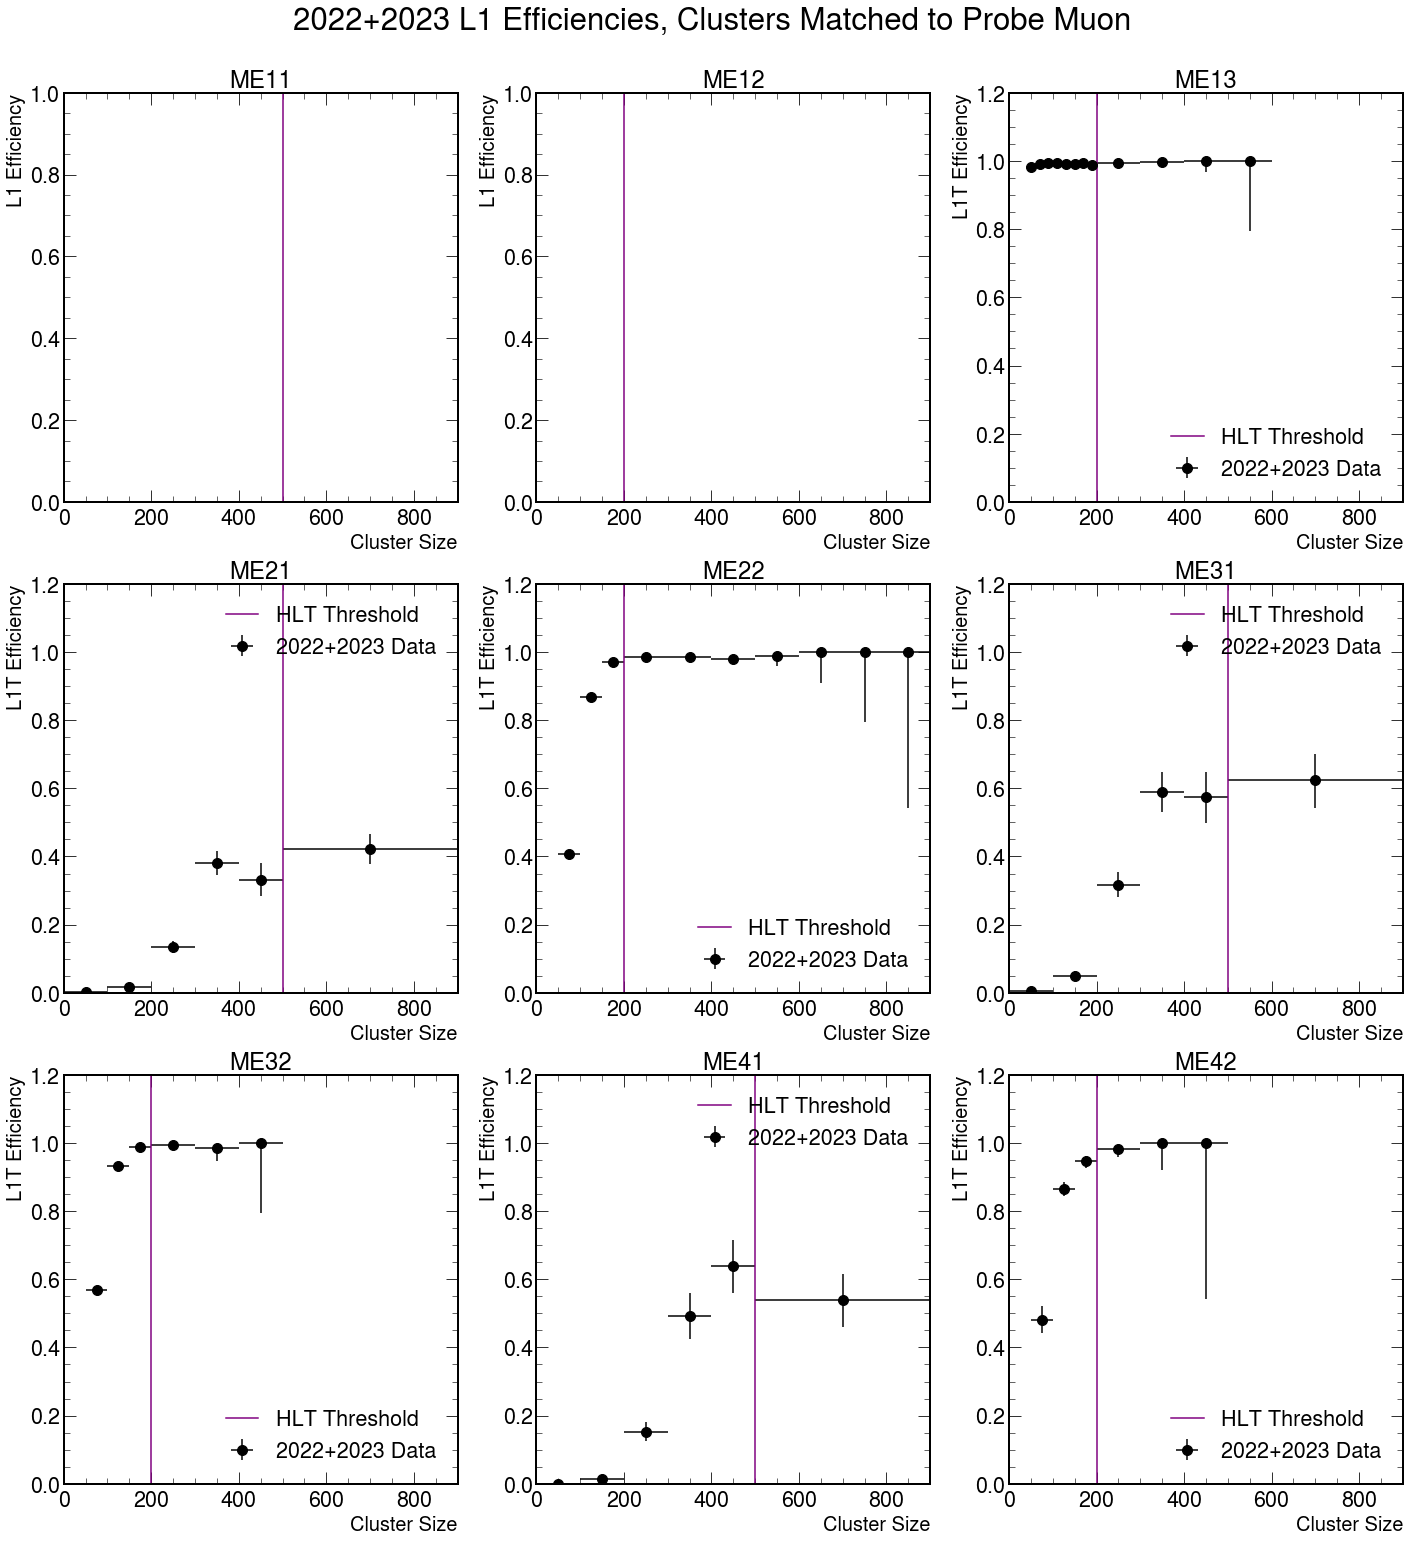

In [15]:
plt.style.use(hep.style.CMS) 
import matplotlib
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 8 * num_rows))
fig.suptitle("2022+2023 L1 Efficiencies, Clusters Matched to Probe Muon")
sample = "all"
#bins = bins_rechits_lowEta_lowNStation10
chambers = ["ME11", "ME12", "ME13", "ME21", "ME22", "ME31", "ME32", "ME41", "ME42"]
counter = 0
for i in range(num_rows):
    for j in range(num_cols):
        
        #chamber = list(chamber_locations.keys())[counter]
        chamber = chambers[counter]
        chamber_list = [chamber]
        chamber_int = int(chamber[2:])
        bins = chamber_locations[chamber]["binning"]
        print(chamber_list)
        num_hist_muon, denom_hist_muon = get_efficiency_hists(events_all_probeMuonMatched, chamber_list, bins)
        #num_hist_notMuon, denom_hist_notMuon = get_efficiency_hists(events_all_MuonMatched_notProbe, chamber, bins)
        counter+=1
        axes[i,j].set_title(chamber, fontsize=24)
        axes[i,j].axvline(chamber_locations[chamber]["HLT_thresh"], color="purple", label="HLT Threshold")
        if chamber=="ME11" or chamber=="ME12": 
            axes[i][j].set_xlabel("Cluster Size", fontsize=20)
            axes[i,j].set_ylabel("L1 Efficiency", fontsize=20)
            axes[i,j].set_xlim(0,900)
            continue
        '''
        num_hist_muon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = num_hist_muon
        num_hist_muon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        denom_hist_muon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = denom_hist_muon
        denom_hist_muon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        num_hist_notMuon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = num_hist_notMuon
        num_hist_notMuon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        denom_hist_notMuon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = denom_hist_notMuon
        denom_hist_notMuon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        '''
        print(chamber)
        hist.plotratio(
                    ax=axes[i,j],
                    num =num_hist_muon.project(bins),
                    denom=denom_hist_muon.project(bins),
                    error_opts={'marker': '.', 'markersize': 20, 'color':'black'},
                    unc='clopper-pearson',
                    label= "2022+2023 Data",
                    clear=False,
                    xerr=True
                )
#         hist.plotratio(
#                     ax=axes[i,j],
#                     num =num_hist_notMuon.project(bins),
#                     denom=denom_hist_notMuon.project(bins),
#                     error_opts={'marker': '.', 'markersize': 20, 'color':colors[1]},
#                     unc='clopper-pearson',
#                     label= "Not Probe Muon",
#                     clear=False,
#                     xerr=True
#                 )
        
        axes[i,j].legend()
        #axes[i,j].set_title(chamber, fontsize=24)
        axes[i][j].set_xlabel("Cluster Size", fontsize=20)
        axes[i,j].set_ylabel("L1T Efficiency", fontsize=20)
        axes[i,j].set_xlim(0,900)
        axes[i,j].set_ylim(0,1.2)
        
plt.subplots_adjust(top=0.93)
plt.savefig("L1_Efficiencies_2022_2023_probeMuonMatched_fullPhiCut_negME31_negME41.png")
plt.show()

ME13


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


ME21
ME22


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


ME31
ME32


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


ME41
ME42


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


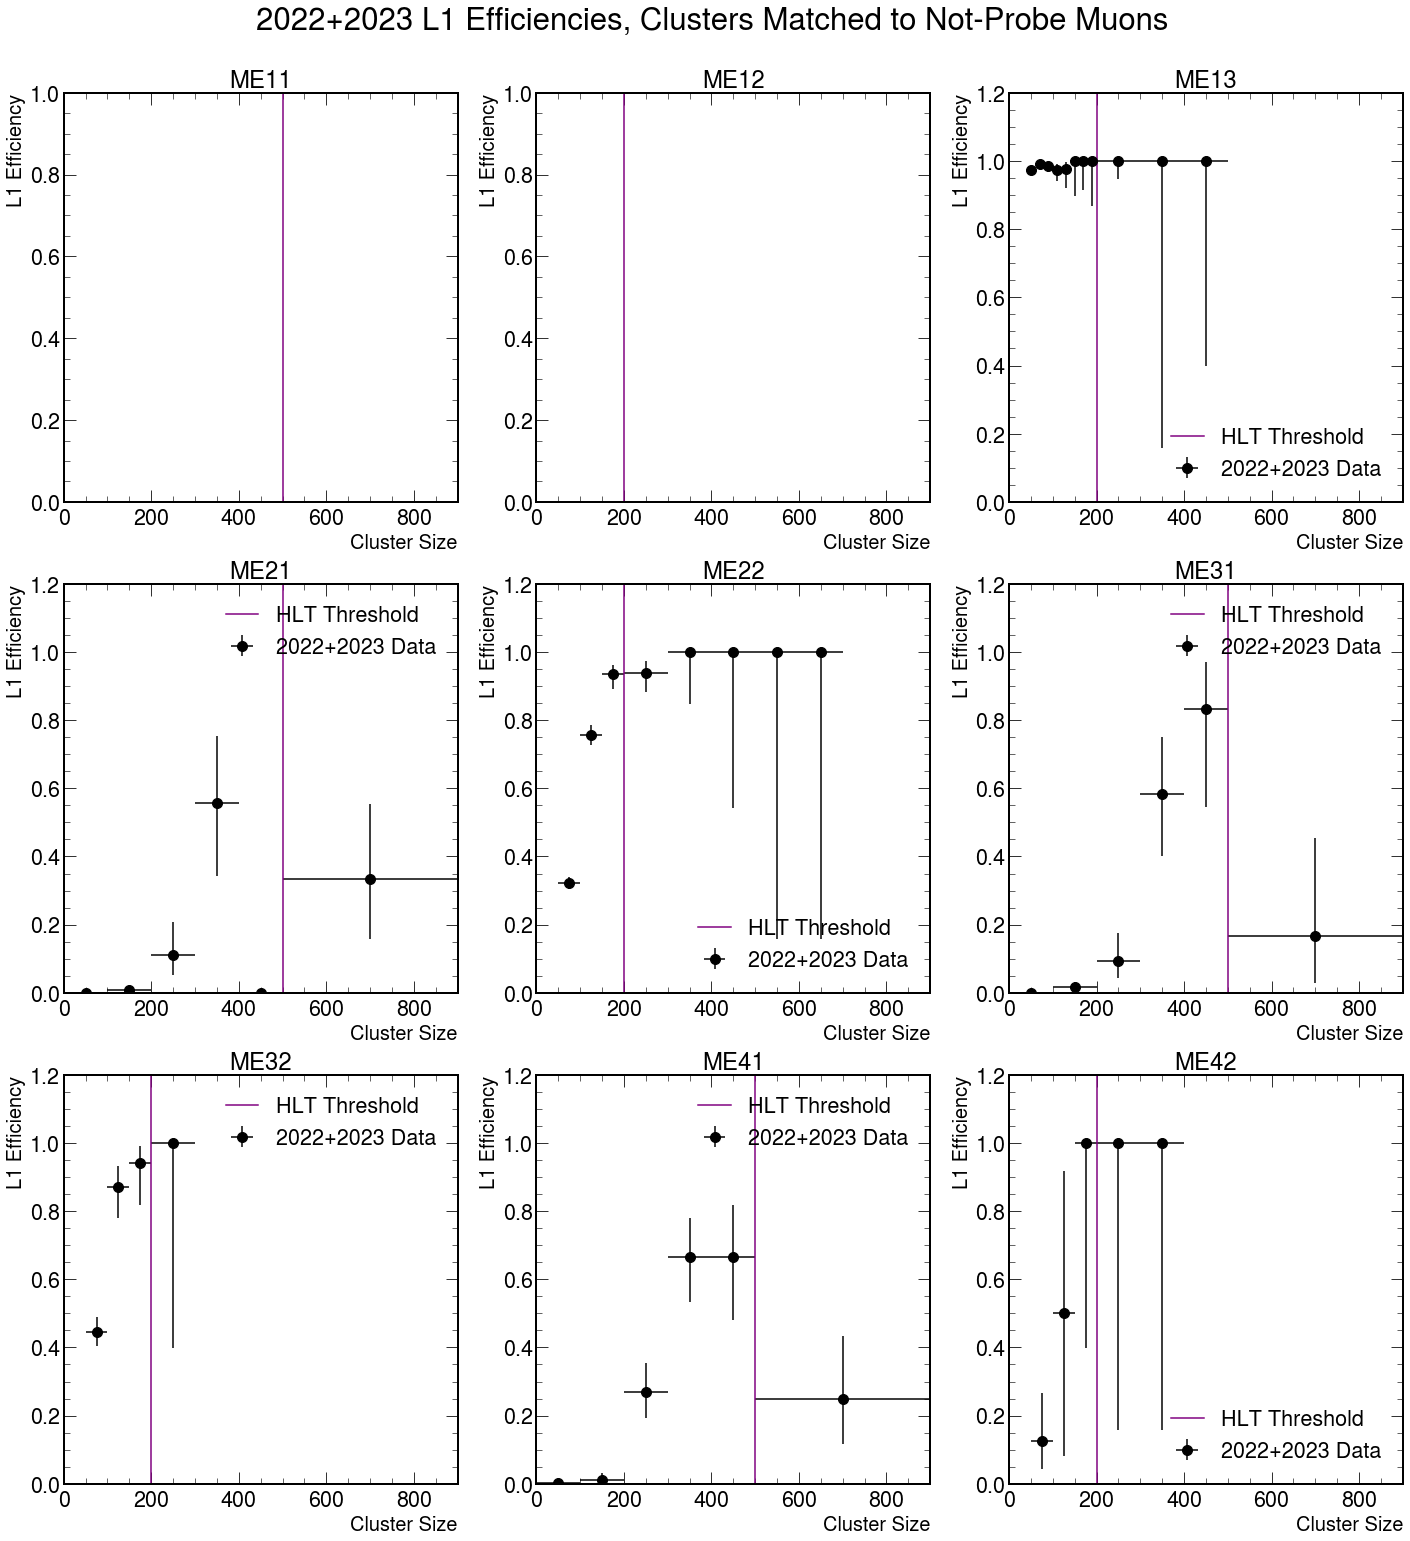

In [32]:
plt.style.use(hep.style.CMS) 
import matplotlib
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 8 * num_rows))
fig.suptitle("2022+2023 L1 Efficiencies, Clusters Matched to Not-Probe Muons")
sample = "all"
#bins = bins_rechits_lowEta_lowNStation10
chambers = ["ME11", "ME12", "ME13", "ME21", "ME22", "ME31", "ME32", "ME41", "ME42"]
counter = 0
for i in range(num_rows):
    for j in range(num_cols):
        
        #chamber = list(chamber_locations.keys())[counter]
        chamber = chambers[counter]
        chamber_int = int(chamber[2:])
        bins = chamber_locations[chamber]["binning"]
        #num_hist_muon, denom_hist_muon = get_efficiency_hists(events_2023_muonMatched_timecut, chamber, bins)
        num_hist_notMuon, denom_hist_notMuon = get_efficiency_hists(events_2023_MuonMatched_notProbe, chamber, bins)
        counter+=1
        axes[i,j].set_title(chamber, fontsize=24)
        axes[i,j].axvline(chamber_locations[chamber]["HLT_thresh"], color="purple", label="HLT Threshold")
        if chamber=="ME11" or chamber=="ME12": 
            axes[i][j].set_xlabel("Cluster Size", fontsize=20)
            axes[i,j].set_ylabel("L1 Efficiency", fontsize=20)
            axes[i,j].set_xlim(0,900)
            continue
        '''
        num_hist_muon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = num_hist_muon
        num_hist_muon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        denom_hist_muon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = denom_hist_muon
        denom_hist_muon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        num_hist_notMuon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = num_hist_notMuon
        num_hist_notMuon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        denom_hist_notMuon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = denom_hist_notMuon
        denom_hist_notMuon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        '''
        print(chamber)
#         hist.plotratio(
#                     ax=axes[i,j],
#                     num =num_hist_muon.project(bins),
#                     denom=denom_hist_muon.project(bins),
#                     error_opts={'marker': '.', 'markersize': 20, 'color':colors[0]},
#                     unc='clopper-pearson',
#                     label= "Muon",
#                     clear=False,
#                     xerr=True
#                 )
        hist.plotratio(
                    ax=axes[i,j],
                    num =num_hist_notMuon.project(bins),
                    denom=denom_hist_notMuon.project(bins),
                    error_opts={'marker': '.', 'markersize': 20, 'color':'black'},
                    unc='clopper-pearson',
                    label= "2022+2023 Data",
                    clear=False,
                    xerr=True
                )
        
        axes[i,j].legend()
        #axes[i,j].set_title(chamber, fontsize=24)
        axes[i][j].set_xlabel("Cluster Size", fontsize=20)
        axes[i,j].set_ylabel("L1 Efficiency", fontsize=20)
        axes[i,j].set_xlim(0,900)
        axes[i,j].set_ylim(0,1.2)
        
plt.subplots_adjust(top=0.93)
plt.savefig("L1_Efficiencies_2022_2023_MuonMatched_notProbe.png")
plt.show()

ME13


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


ME21
ME22


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


ME31
ME32


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


ME41
ME42


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


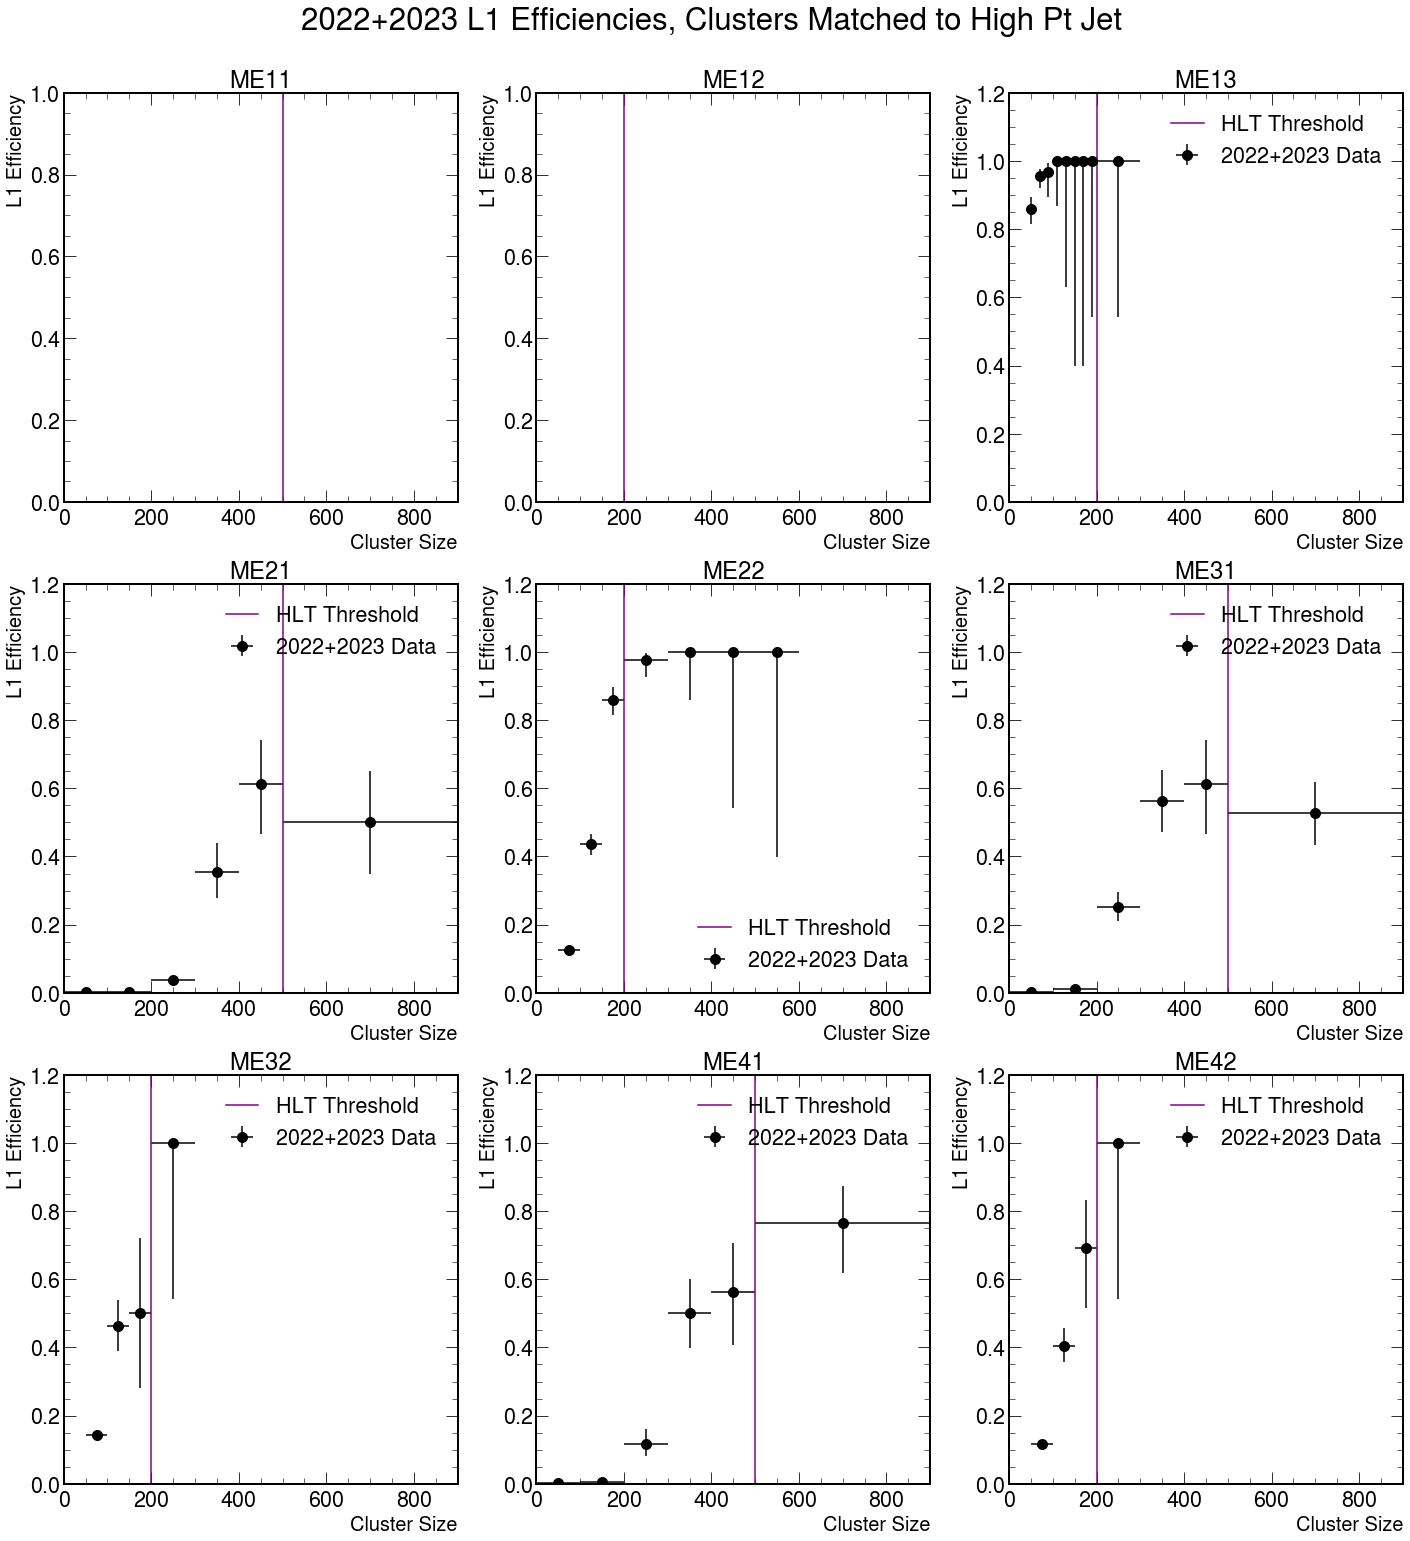

In [31]:
plt.style.use(hep.style.CMS) 
import matplotlib
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 8 * num_rows))
fig.suptitle("2022+2023 L1 Efficiencies, Clusters Matched to High Pt Jet")
sample = "all"
#bins = bins_rechits_lowEta_lowNStation10
chambers = ["ME11", "ME12", "ME13", "ME21", "ME22", "ME31", "ME32", "ME41", "ME42"]
counter = 0
for i in range(num_rows):
    for j in range(num_cols):
        
        #chamber = list(chamber_locations.keys())[counter]
        chamber = chambers[counter]
        chamber_int = int(chamber[2:])
        bins = chamber_locations[chamber]["binning"]
        num_hist_jet, denom_hist_jet = get_efficiency_hists(events_all_highPtJetMatched, chamber, bins)
        #num_hist_notMuon, denom_hist_notMuon = get_efficiency_hists(events_all_MuonMatched_notProbe, chamber, bins)
        counter+=1
        axes[i,j].set_title(chamber, fontsize=24)
        axes[i,j].axvline(chamber_locations[chamber]["HLT_thresh"], color="purple", label="HLT Threshold")
        if chamber=="ME11" or chamber=="ME12": 
            axes[i][j].set_xlabel("Cluster Size", fontsize=20)
            axes[i,j].set_ylabel("L1 Efficiency", fontsize=20)
            axes[i,j].set_xlim(0,900)
            continue
        '''
        num_hist_muon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = num_hist_muon
        num_hist_muon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        denom_hist_muon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = denom_hist_muon
        denom_hist_muon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        num_hist_notMuon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = num_hist_notMuon
        num_hist_notMuon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        denom_hist_notMuon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = denom_hist_notMuon
        denom_hist_notMuon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        '''
        print(chamber)
        hist.plotratio(
                    ax=axes[i,j],
                    num =num_hist_jet.project(bins),
                    denom=denom_hist_jet.project(bins),
                    error_opts={'marker': '.', 'markersize': 20, 'color':'black'},
                    unc='clopper-pearson',
                    label= "2022+2023 Data",
                    clear=False,
                    xerr=True
                )
#         hist.plotratio(
#                     ax=axes[i,j],
#                     num =num_hist_notMuon.project(bins),
#                     denom=denom_hist_notMuon.project(bins),
#                     error_opts={'marker': '.', 'markersize': 20, 'color':colors[1]},
#                     unc='clopper-pearson',
#                     label= "Not Probe Muon",
#                     clear=False,
#                     xerr=True
#                 )
        
        axes[i,j].legend()
        #axes[i,j].set_title(chamber, fontsize=24)
        axes[i][j].set_xlabel("Cluster Size", fontsize=20)
        axes[i,j].set_ylabel("L1 Efficiency", fontsize=20)
        axes[i,j].set_xlim(0,900)
        axes[i,j].set_ylim(0,1.2)
        
plt.subplots_adjust(top=0.93)
plt.savefig("L1_Efficiencies_2022_2023_highPtJetMatched.png")
plt.show()

ME13


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


ME21
ME22


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


ME31
ME32


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


ME41
ME42


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


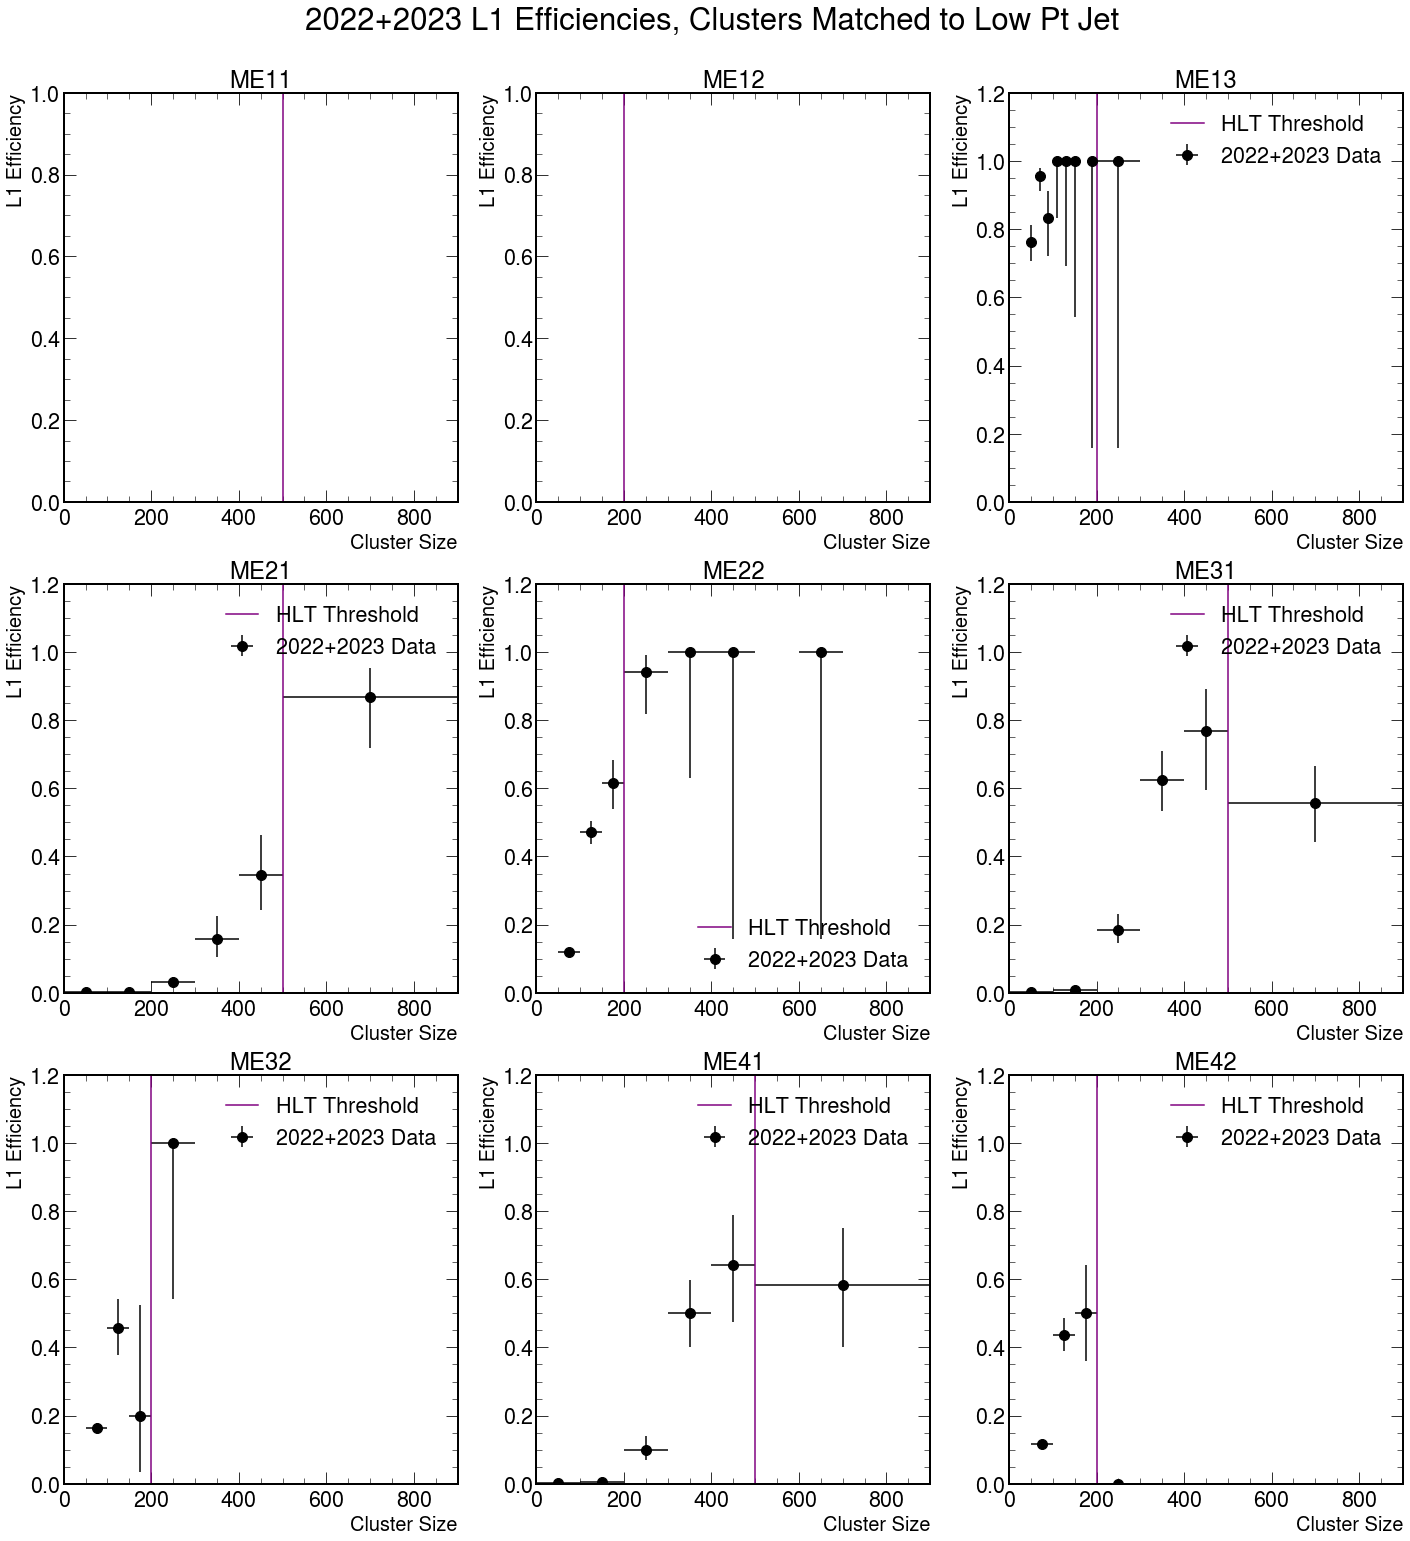

In [33]:
plt.style.use(hep.style.CMS) 
import matplotlib
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 8 * num_rows))
fig.suptitle("2022+2023 L1 Efficiencies, Clusters Matched to Low Pt Jet")
sample = "all"
#bins = bins_rechits_lowEta_lowNStation10
chambers = ["ME11", "ME12", "ME13", "ME21", "ME22", "ME31", "ME32", "ME41", "ME42"]
counter = 0
for i in range(num_rows):
    for j in range(num_cols):
        
        #chamber = list(chamber_locations.keys())[counter]
        chamber = chambers[counter]
        chamber_int = int(chamber[2:])
        bins = chamber_locations[chamber]["binning"]
        num_hist_jet, denom_hist_jet = get_efficiency_hists(events_all_lowPtJetMatched, chamber, bins)
        #num_hist_notMuon, denom_hist_notMuon = get_efficiency_hists(events_all_MuonMatched_notProbe, chamber, bins)
        counter+=1
        axes[i,j].set_title(chamber, fontsize=24)
        axes[i,j].axvline(chamber_locations[chamber]["HLT_thresh"], color="purple", label="HLT Threshold")
        if chamber=="ME11" or chamber=="ME12": 
            axes[i][j].set_xlabel("Cluster Size", fontsize=20)
            axes[i,j].set_ylabel("L1 Efficiency", fontsize=20)
            axes[i,j].set_xlim(0,900)
            continue
        '''
        num_hist_muon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = num_hist_muon
        num_hist_muon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        denom_hist_muon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = denom_hist_muon
        denom_hist_muon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        num_hist_notMuon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = num_hist_notMuon
        num_hist_notMuon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        denom_hist_notMuon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = denom_hist_notMuon
        denom_hist_notMuon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        '''
        print(chamber)
        hist.plotratio(
                    ax=axes[i,j],
                    num =num_hist_jet.project(bins),
                    denom=denom_hist_jet.project(bins),
                    error_opts={'marker': '.', 'markersize': 20, 'color':'black'},
                    unc='clopper-pearson',
                    label= "2022+2023 Data",
                    clear=False,
                    xerr=True
                )
#         hist.plotratio(
#                     ax=axes[i,j],
#                     num =num_hist_notMuon.project(bins),
#                     denom=denom_hist_notMuon.project(bins),
#                     error_opts={'marker': '.', 'markersize': 20, 'color':colors[1]},
#                     unc='clopper-pearson',
#                     label= "Not Probe Muon",
#                     clear=False,
#                     xerr=True
#                 )
        
        axes[i,j].legend()
        #axes[i,j].set_title(chamber, fontsize=24)
        axes[i][j].set_xlabel("Cluster Size", fontsize=20)
        axes[i,j].set_ylabel("L1 Efficiency", fontsize=20)
        axes[i,j].set_xlim(0,900)
        axes[i,j].set_ylim(0,1.2)
        
plt.subplots_adjust(top=0.93)
plt.savefig("L1_Efficiencies_2022_2023_lowPtJetMatched.png")
plt.show()

ME13


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


ME21
ME22


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


ME31
ME32


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


ME41
ME42


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


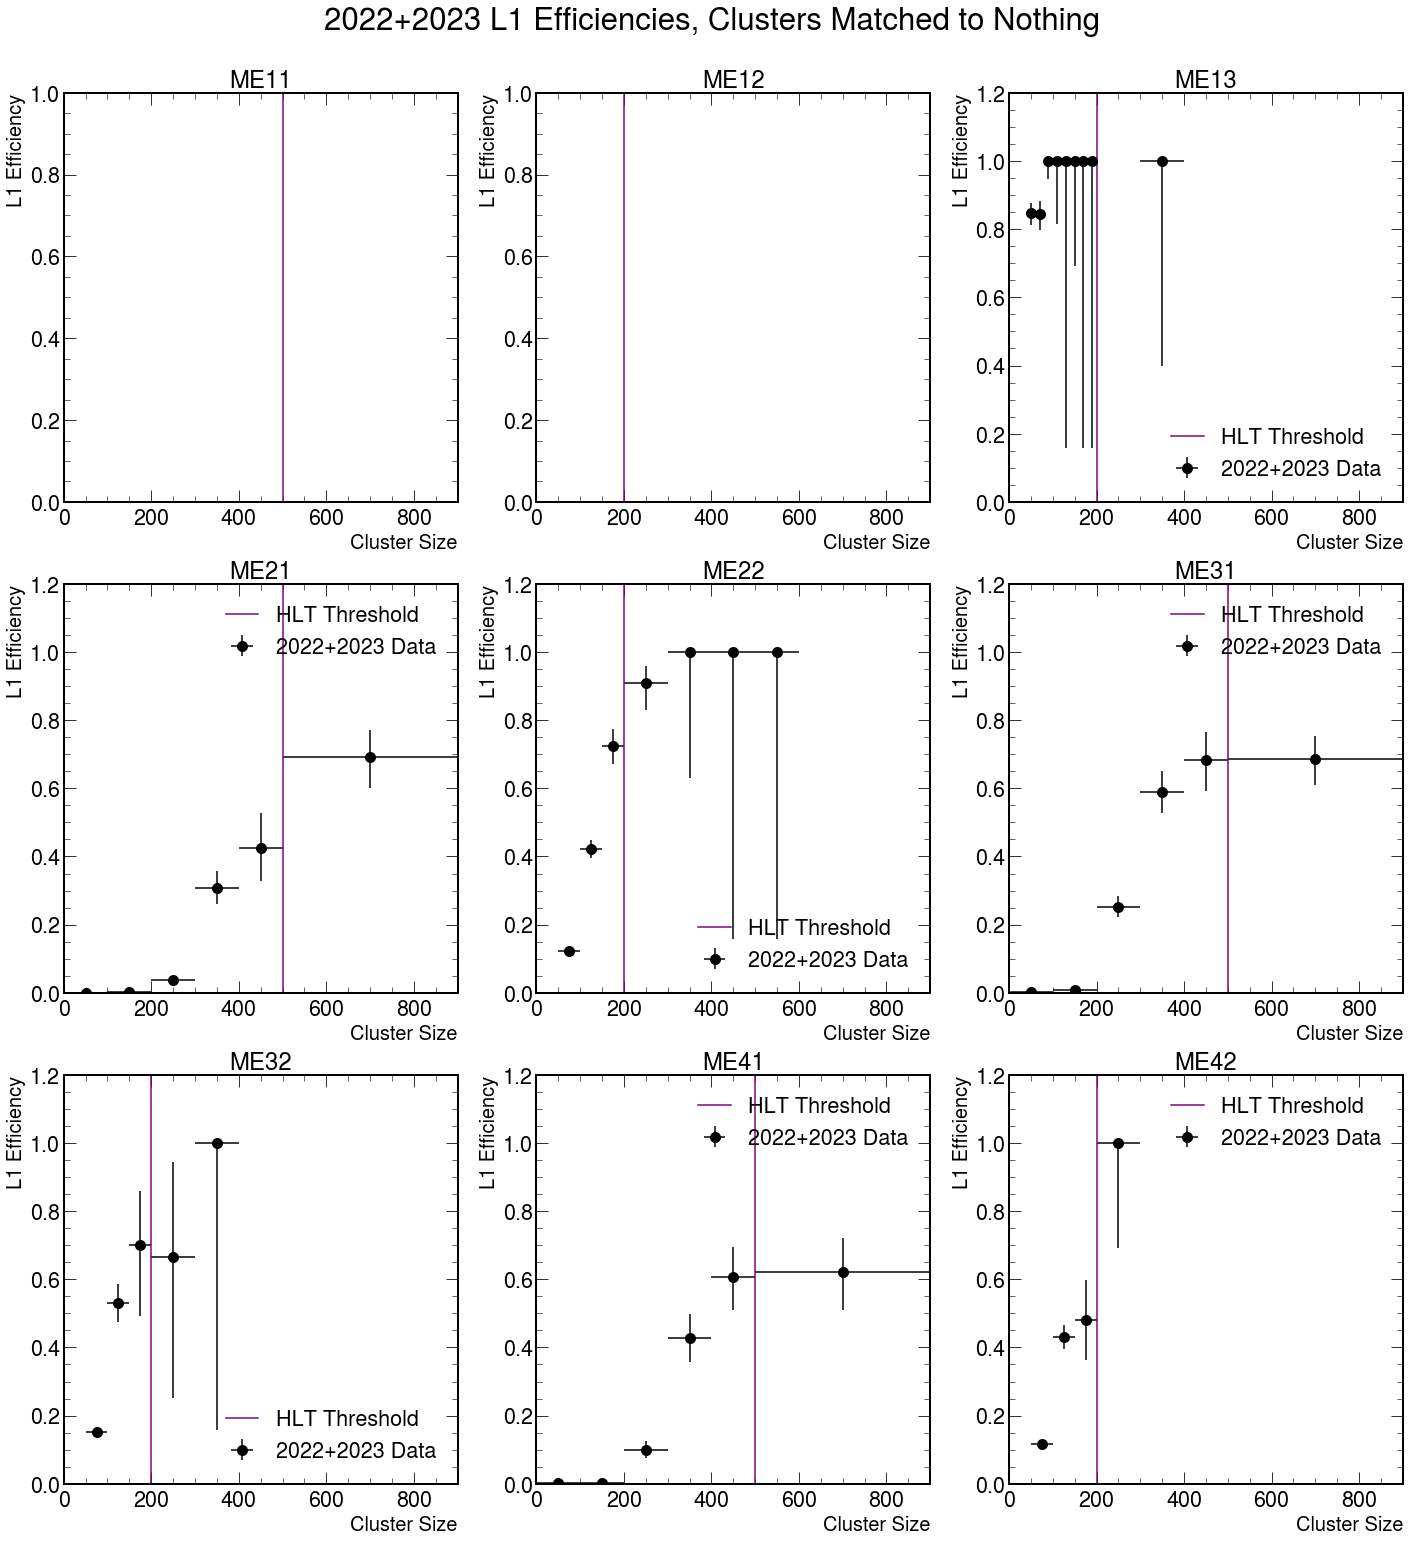

In [34]:
plt.style.use(hep.style.CMS) 
import matplotlib
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 8 * num_rows))
fig.suptitle("2022+2023 L1 Efficiencies, Clusters Matched to Nothing")
sample = "all"
#bins = bins_rechits_lowEta_lowNStation10
chambers = ["ME11", "ME12", "ME13", "ME21", "ME22", "ME31", "ME32", "ME41", "ME42"]
counter = 0
for i in range(num_rows):
    for j in range(num_cols):
        
        #chamber = list(chamber_locations.keys())[counter]
        chamber = chambers[counter]
        chamber_int = int(chamber[2:])
        bins = chamber_locations[chamber]["binning"]
        num_hist_jet, denom_hist_jet = get_efficiency_hists(events_all_nothingMatched, chamber, bins)
        #num_hist_notMuon, denom_hist_notMuon = get_efficiency_hists(events_all_MuonMatched_notProbe, chamber, bins)
        counter+=1
        axes[i,j].set_title(chamber, fontsize=24)
        axes[i,j].axvline(chamber_locations[chamber]["HLT_thresh"], color="purple", label="HLT Threshold")
        if chamber=="ME11" or chamber=="ME12": 
            axes[i][j].set_xlabel("Cluster Size", fontsize=20)
            axes[i,j].set_ylabel("L1 Efficiency", fontsize=20)
            axes[i,j].set_xlim(0,900)
            continue
        '''
        num_hist_muon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = num_hist_muon
        num_hist_muon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        denom_hist_muon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = denom_hist_muon
        denom_hist_muon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        num_hist_notMuon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = num_hist_notMuon
        num_hist_notMuon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        denom_hist_notMuon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = denom_hist_notMuon
        denom_hist_notMuon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        '''
        print(chamber)
        hist.plotratio(
                    ax=axes[i,j],
                    num =num_hist_jet.project(bins),
                    denom=denom_hist_jet.project(bins),
                    error_opts={'marker': '.', 'markersize': 20, 'color':'black'},
                    unc='clopper-pearson',
                    label= "2022+2023 Data",
                    clear=False,
                    xerr=True
                )
#         hist.plotratio(
#                     ax=axes[i,j],
#                     num =num_hist_notMuon.project(bins),
#                     denom=denom_hist_notMuon.project(bins),
#                     error_opts={'marker': '.', 'markersize': 20, 'color':colors[1]},
#                     unc='clopper-pearson',
#                     label= "Not Probe Muon",
#                     clear=False,
#                     xerr=True
#                 )
        
        axes[i,j].legend()
        #axes[i,j].set_title(chamber, fontsize=24)
        axes[i][j].set_xlabel("Cluster Size", fontsize=20)
        axes[i,j].set_ylabel("L1 Efficiency", fontsize=20)
        axes[i,j].set_xlim(0,900)
        axes[i,j].set_ylim(0,1.2)
        
plt.subplots_adjust(top=0.93)
plt.savefig("L1_Efficiencies_2022_2023_nothingMatched.png")
plt.show()

NameError: name 'events_2023_muonMatched_timecut' is not defined

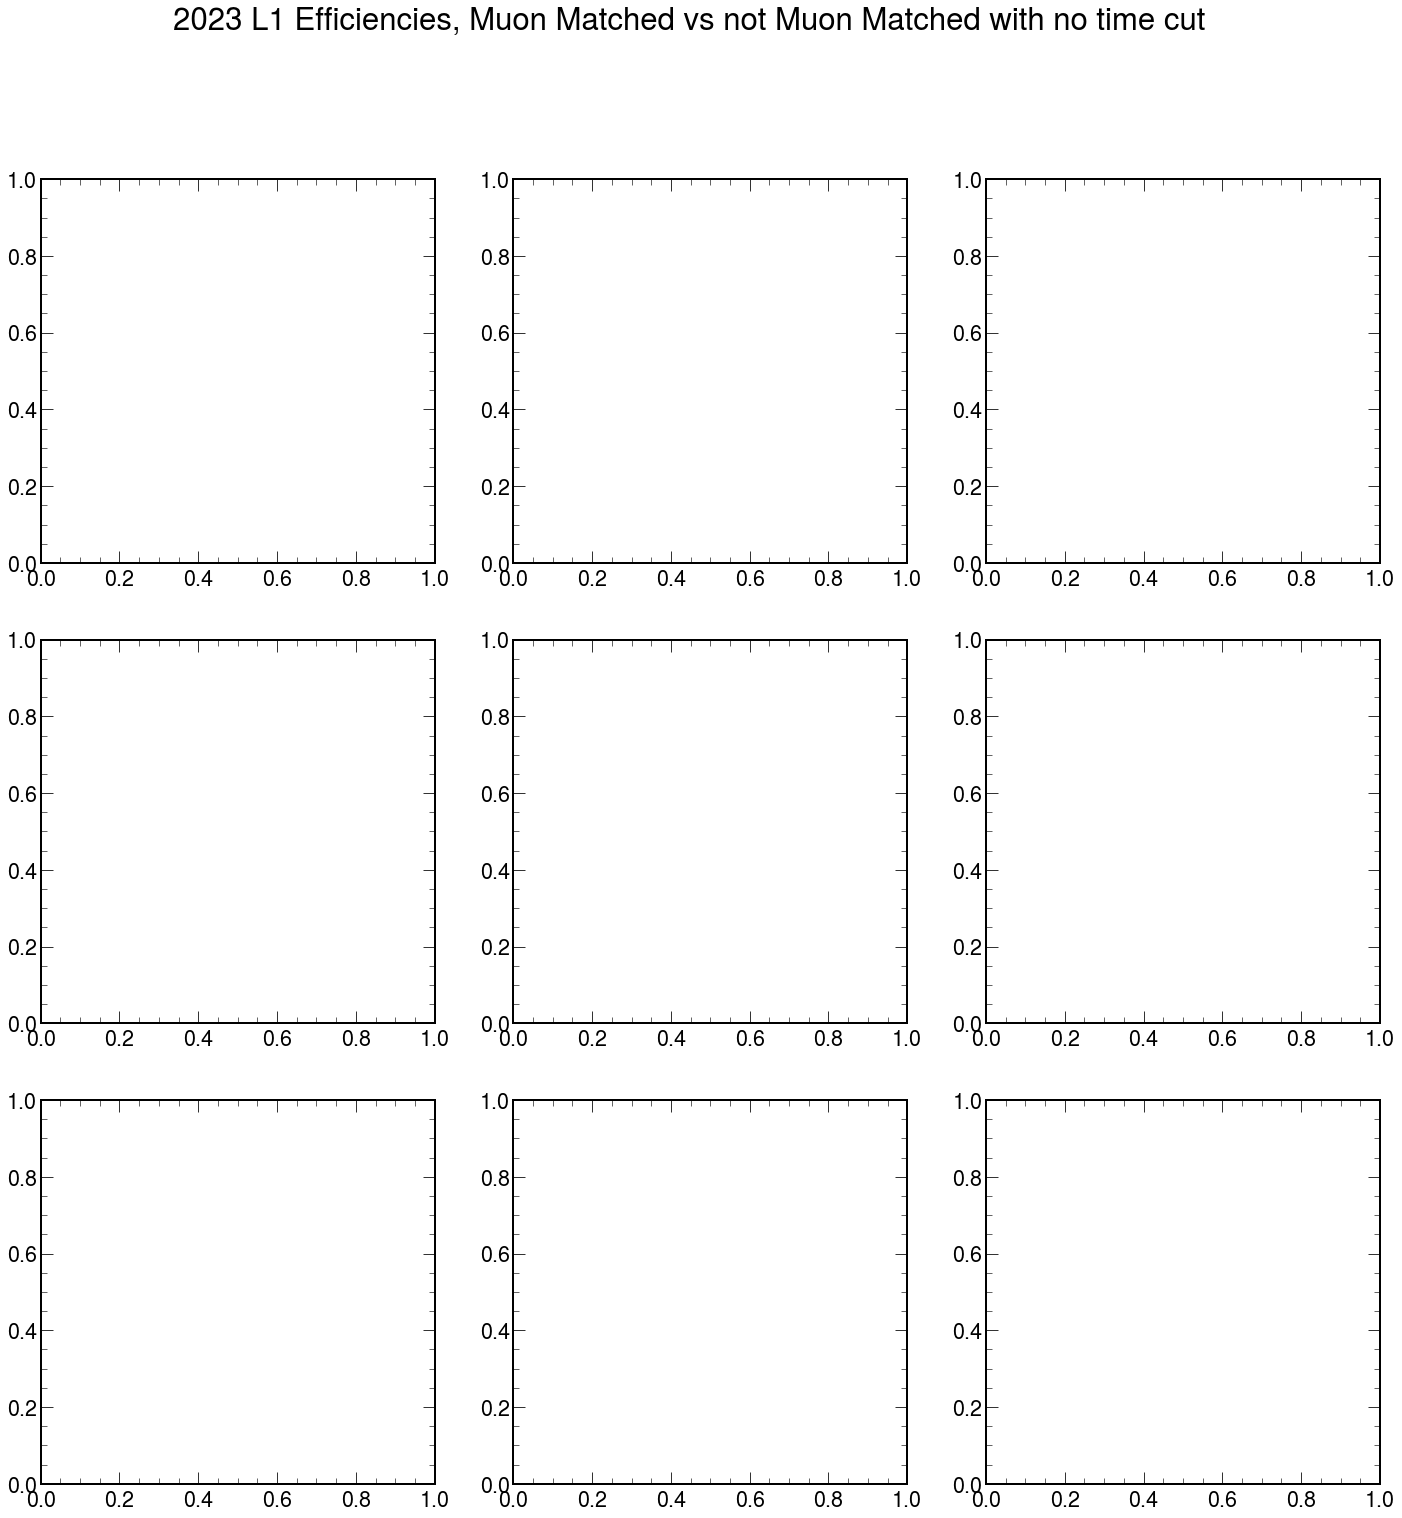

In [35]:
plt.style.use(hep.style.CMS) 
import matplotlib
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 8 * num_rows))
fig.suptitle("2023 L1 Efficiencies, Muon Matched vs not Muon Matched with no time cut")
sample = "all"
#bins = bins_rechits_lowEta_lowNStation10
chambers = ["ME11", "ME12", "ME13", "ME21", "ME22", "ME31", "ME32", "ME41", "ME42"]
counter = 0
for i in range(num_rows):
    for j in range(num_cols):
        
        #chamber = list(chamber_locations.keys())[counter]
        chamber = chambers[counter]
        chamber_int = int(chamber[2:])
        bins = chamber_locations[chamber]["binning"]
        num_hist_muon, denom_hist_muon = get_efficiency_hists(events_2023_muonMatched_timecut, chamber, bins)
        num_hist_notMuon, denom_hist_notMuon = get_efficiency_hists(events_2023_notMuonMatched_timecut, chamber, bins)
        counter+=1
        axes[i,j].set_title(chamber, fontsize=24)
        axes[i,j].axvline(chamber_locations[chamber]["HLT_thresh"], color="black", label="HLT Threshold")
        if chamber=="ME11" or chamber=="ME12": 
            axes[i][j].set_xlabel("Cluster Size", fontsize=20)
            axes[i,j].set_ylabel("L1 Efficiency", fontsize=20)
            axes[i,j].set_xlim(0,900)
            continue
        '''
        num_hist_muon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = num_hist_muon
        num_hist_muon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        denom_hist_muon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = denom_hist_muon
        denom_hist_muon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        num_hist_notMuon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = num_hist_notMuon
        num_hist_notMuon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        denom_hist_notMuon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = denom_hist_notMuon
        denom_hist_notMuon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        '''
        print(chamber)
        hist.plotratio(
                    ax=axes[i,j],
                    num =num_hist_muon.project(bins),
                    denom=denom_hist_muon.project(bins),
                    error_opts={'marker': '.', 'markersize': 20, 'color':colors[0]},
                    unc='clopper-pearson',
                    label= "Muon",
                    clear=False,
                    xerr=True
                )
        hist.plotratio(
                    ax=axes[i,j],
                    num =num_hist_notMuon.project(bins),
                    denom=denom_hist_notMuon.project(bins),
                    error_opts={'marker': '.', 'markersize': 20, 'color':colors[1]},
                    unc='clopper-pearson',
                    label= "Not Muon",
                    clear=False,
                    xerr=True
                )
        
        axes[i,j].legend()
        #axes[i,j].set_title(chamber, fontsize=24)
        axes[i][j].set_xlabel("Cluster Size", fontsize=20)
        axes[i,j].set_ylabel("L1 Efficiency", fontsize=20)
        axes[i,j].set_xlim(0,900)
        axes[i,j].set_ylim(0,1.2)
        
plt.subplots_adjust(top=0.93)
plt.savefig("L1_Efficiencies_2023_muoncut_vs_not.png")
plt.show()

In [ ]:
plt.style.use(hep.style.CMS) 
import matplotlib
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 8 * num_rows))
fig.suptitle("2022 L1 Efficiencies, Muon Matched vs not Muon Matched with no time cut")
sample = "all"
#bins = bins_rechits_lowEta_lowNStation10
chambers = ["ME11", "ME12", "ME13", "ME21", "ME22", "ME31", "ME32", "ME41", "ME42"]
counter = 0
for i in range(num_rows):
    for j in range(num_cols):
        
        #chamber = list(chamber_locations.keys())[counter]
        chamber = chambers[counter]
        chamber_int = int(chamber[2:])
        bins = chamber_locations[chamber]["binning"]
        num_hist_muon, denom_hist_muon = get_efficiency_hists(events_2022_muonMatched_notimecut, chamber, bins)
        num_hist_notMuon, denom_hist_notMuon = get_efficiency_hists(events_2022_notMuonMatched_notimecut, chamber, bins)
        counter+=1
        axes[i,j].set_title(chamber, fontsize=24)
        axes[i,j].axvline(chamber_locations[chamber]["HLT_thresh"], color="black", label="HLT Threshold")
        if chamber=="ME11" or chamber=="ME12": 
            axes[i][j].set_xlabel("Cluster Size", fontsize=20)
            axes[i,j].set_ylabel("L1 Efficiency", fontsize=20)
            axes[i,j].set_xlim(0,900)
            continue
        '''
        num_hist_muon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = num_hist_muon
        num_hist_muon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        denom_hist_muon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = denom_hist_muon
        denom_hist_muon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        num_hist_notMuon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = num_hist_notMuon
        num_hist_notMuon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        denom_hist_notMuon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = denom_hist_notMuon
        denom_hist_notMuon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        '''
        print(chamber)
        hist.plotratio(
                    ax=axes[i,j],
                    num =num_hist_muon.project(bins),
                    denom=denom_hist_muon.project(bins),
                    error_opts={'marker': '.', 'markersize': 20, 'color':colors[0]},
                    unc='clopper-pearson',
                    label= "Muon",
                    clear=False,
                    xerr=True
                )
        hist.plotratio(
                    ax=axes[i,j],
                    num =num_hist_notMuon.project(bins),
                    denom=denom_hist_notMuon.project(bins),
                    error_opts={'marker': '.', 'markersize': 20, 'color':colors[1]},
                    unc='clopper-pearson',
                    label= "Not Muon",
                    clear=False,
                    xerr=True
                )
        
        axes[i,j].legend()
        #axes[i,j].set_title(chamber, fontsize=24)
        axes[i][j].set_xlabel("Cluster Size", fontsize=20)
        axes[i,j].set_ylabel("L1 Efficiency", fontsize=20)
        axes[i,j].set_xlim(0,900)
        
plt.subplots_adjust(top=0.93)
plt.savefig("L1_Efficiencies_2022_muoncut_vs_not_notimecut.png")
plt.show()

In [ ]:
plt.style.use(hep.style.CMS) 
import matplotlib
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 8 * num_rows))
fig.suptitle("2023 L1 Efficiencies, Muon Matched vs not Muon Matched with no time cut")
sample = "all"
#bins = bins_rechits_lowEta_lowNStation10
chambers = ["ME11", "ME12", "ME13", "ME21", "ME22", "ME31", "ME32", "ME41", "ME42"]
counter = 0
for i in range(num_rows):
    for j in range(num_cols):
        
        #chamber = list(chamber_locations.keys())[counter]
        chamber = chambers[counter]
        chamber_int = int(chamber[2:])
        bins = chamber_locations[chamber]["binning"]
        num_hist_muon, denom_hist_muon = get_efficiency_hists(events_2023_muonMatched_notimecut, chamber, bins)
        num_hist_notMuon, denom_hist_notMuon = get_efficiency_hists(events_2023_notMuonMatched_notimecut, chamber, bins)
        counter+=1
        axes[i,j].set_title(chamber, fontsize=24)
        axes[i,j].axvline(chamber_locations[chamber]["HLT_thresh"], color="black", label="HLT Threshold")
        if chamber=="ME11" or chamber=="ME12": 
            axes[i][j].set_xlabel("Cluster Size", fontsize=20)
            axes[i,j].set_ylabel("L1 Efficiency", fontsize=20)
            axes[i,j].set_xlim(0,900)
            continue
        '''
        num_hist_muon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = num_hist_muon
        num_hist_muon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        denom_hist_muon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = denom_hist_muon
        denom_hist_muon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        num_hist_notMuon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = num_hist_notMuon
        num_hist_notMuon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        denom_hist_notMuon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = denom_hist_notMuon
        denom_hist_notMuon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        '''
        print(chamber)
        hist.plotratio(
                    ax=axes[i,j],
                    num =num_hist_muon.project(bins),
                    denom=denom_hist_muon.project(bins),
                    error_opts={'marker': '.', 'markersize': 20, 'color':colors[0]},
                    unc='clopper-pearson',
                    label= "Muon",
                    clear=False,
                    xerr=True
                )
        hist.plotratio(
                    ax=axes[i,j],
                    num =num_hist_notMuon.project(bins),
                    denom=denom_hist_notMuon.project(bins),
                    error_opts={'marker': '.', 'markersize': 20, 'color':colors[1]},
                    unc='clopper-pearson',
                    label= "Not Muon",
                    clear=False,
                    xerr=True
                )
        
        axes[i,j].legend()
        #axes[i,j].set_title(chamber, fontsize=24)
        axes[i][j].set_xlabel("Cluster Size", fontsize=20)
        axes[i,j].set_ylabel("L1 Efficiency", fontsize=20)
        axes[i,j].set_xlim(0,900)
        
plt.subplots_adjust(top=0.93)
plt.savefig("L1_Efficiencies_2023_muoncut_vs_not_notimecut.png")
plt.show()